<a href="https://colab.research.google.com/github/stevenguyen72/CBDRobotic-internship/blob/master/AIRLINE_ARRIVALS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AIRLINE ARRIVALS PROJECT**



#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sys
import os
from scipy.stats import f_oneway
from IPython.display import Image
# Tensorflow
!pip install -U tensorflow-addons
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
# tqdm
import tqdm
# sklearn
import sklearn
# metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
# Logistic
from sklearn.linear_model import LogisticRegression
#SVM
from sklearn.svm import SVC
#Naive Bayes
from sklearn.naive_bayes import CategoricalNB
# ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# feature_selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
# preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import scale
# quietly deep-reload tqdm
from IPython.lib import deepreload

Requirement already up-to-date: tensorflow-addons in /usr/local/lib/python3.6/dist-packages (0.11.2)


# Merge Files

Because the individual file just have 1 month, so we have to collect all 12 months of 2019 and then merge them into 1 big file.

In [ ]:
files = ['REPORTING1','REPORTING2','REPORTING3','REPORTING4','REPORTING5','REPORTING6','REPORTING7','REPORTING8',
         'REPORTING9','REPORTING10','REPORTING11','REPORTING12']

months = [1,2,3,4,5,6,7,8,9,10,11,12]

Because a single file already have more than 600,000 samples, so merging them all will create a big file that have approx 7.2 millions samples. Its too big for a study purpose, so we have to reduct the samples.

We use SAMPLE function in Dataframe to auto random samples and just keep 2% of samples in the orginial one. (approx 12,000 samples per month)

In [ ]:
for i in range(12):
  months[i] = pd.read_csv('/content/drive/My Drive/report-airline/%s.csv' % files[i])
  months[i] = months[i].sample(frac=0.02, random_state=1)

Merge them using CONCAT

In [ ]:
pd_csv = pd.concat([months[0],months[1],months[2],months[3],months[4],months[5],months[6],months[7],months[8],
                 months[9],months[10],months[11]])


Saving file

In [ ]:
pd_csv.to_csv('/content/drive/My Drive/report-airline/report')

# Load Original File

In [ ]:
df = pd.read_csv('/content/drive/My Drive/report-airline/report')
df = df.drop(['Unnamed: 0','Unnamed: 32'], 1)

#Analyse Data

##First look at data and remove NAN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148441 entries, 0 to 148440
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MONTH                  148441 non-null  int64  
 1   DAY_OF_MONTH           148441 non-null  int64  
 2   DAY_OF_WEEK            148441 non-null  int64  
 3   OP_UNIQUE_CARRIER      148441 non-null  object 
 4   OP_CARRIER_AIRLINE_ID  148441 non-null  int64  
 5   OP_CARRIER_FL_NUM      148441 non-null  int64  
 6   ORIGIN_AIRPORT_ID      148441 non-null  int64  
 7   ORIGIN                 148441 non-null  object 
 8   DEST_AIRPORT_ID        148441 non-null  int64  
 9   DEST                   148441 non-null  object 
 10  CRS_DEP_TIME           148441 non-null  int64  
 11  DEP_TIME               145822 non-null  float64
 12  DEP_DELAY              145821 non-null  float64
 13  DEP_DELAY_NEW          145821 non-null  float64
 14  DEP_DEL15              145821 non-nu

Data have a few null values, so we just remove them.

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145359 entries, 0 to 148440
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MONTH                  145359 non-null  int64  
 1   DAY_OF_MONTH           145359 non-null  int64  
 2   DAY_OF_WEEK            145359 non-null  int64  
 3   OP_UNIQUE_CARRIER      145359 non-null  object 
 4   OP_CARRIER_AIRLINE_ID  145359 non-null  int64  
 5   OP_CARRIER_FL_NUM      145359 non-null  int64  
 6   ORIGIN_AIRPORT_ID      145359 non-null  int64  
 7   ORIGIN                 145359 non-null  object 
 8   DEST_AIRPORT_ID        145359 non-null  int64  
 9   DEST                   145359 non-null  object 
 10  CRS_DEP_TIME           145359 non-null  int64  
 11  DEP_TIME               145359 non-null  float64
 12  DEP_DELAY              145359 non-null  float64
 13  DEP_DELAY_NEW          145359 non-null  float64
 14  DEP_DEL15              145359 non-nu

In [ ]:
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP
0,1,23,3,WN,19393,796,13232,MDW,11433,DTW,1405,1443.0,38.0,38.0,1.0,2.0,20.0,1503.0,1648.0,7.0,1610,1655.0,45.0,45.0,0.0,0.0,65.0,72.0,45.0,1.0,228.0,1
1,1,2,3,F9,20436,438,11292,DEN,13342,MKE,1515,1511.0,-4.0,0.0,0.0,-1.0,12.0,1523.0,1826.0,26.0,1843,1852.0,9.0,9.0,0.0,0.0,148.0,161.0,123.0,1.0,896.0,4
2,1,2,3,WN,19393,6708,13232,MDW,13487,MSP,2200,4.0,124.0,124.0,1.0,8.0,7.0,11.0,108.0,4.0,2325,112.0,107.0,107.0,0.0,0.0,85.0,68.0,57.0,1.0,349.0,2
3,1,23,3,WN,19393,660,10397,ATL,12339,IND,2125,2303.0,98.0,98.0,1.0,6.0,26.0,2329.0,26.0,5.0,2255,31.0,96.0,96.0,0.0,0.0,90.0,88.0,57.0,1.0,432.0,2
4,1,9,3,9E,20363,3344,12953,LGA,14986,SRQ,1016,1009.0,-7.0,0.0,0.0,-1.0,75.0,1124.0,1351.0,3.0,1342,1354.0,12.0,12.0,0.0,0.0,206.0,225.0,147.0,1.0,1047.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148436,12,16,1,B6,20409,1460,11697,FLL,10529,BDL,1554,1604.0,10.0,10.0,0.0,0.0,15.0,1619.0,1845.0,5.0,1848,1850.0,2.0,2.0,0.0,0.0,174.0,166.0,146.0,1.0,1173.0,5
148437,12,31,2,WN,19393,19,11259,DAL,12191,HOU,1130,1128.0,-2.0,0.0,0.0,-1.0,12.0,1140.0,1225.0,2.0,1240,1227.0,-13.0,0.0,0.0,0.0,70.0,59.0,45.0,1.0,239.0,1
148438,12,20,5,AA,19805,2625,11298,DFW,13487,MSP,2359,2355.0,-4.0,0.0,0.0,-1.0,9.0,4.0,158.0,4.0,220,202.0,-18.0,0.0,0.0,0.0,141.0,127.0,114.0,1.0,852.0,4
148439,12,14,6,DL,19790,2783,11146,CRW,10397,ATL,605,604.0,-1.0,0.0,0.0,-1.0,13.0,617.0,721.0,10.0,739,731.0,-8.0,0.0,0.0,0.0,94.0,87.0,64.0,1.0,363.0,2


In [ ]:
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP
count,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.0,145359.0,145359.000000,145359.000000,145359.000000,145359.0,145359.000000,145359.000000
mean,6.601070,15.714823,3.935250,19986.660028,2542.913490,12650.252582,12650.576779,1326.340103,1332.338115,10.834589,14.020288,0.185252,0.073941,17.396694,1355.931329,1457.498978,7.746331,1483.780082,1461.363335,5.414209,14.186167,0.0,0.0,142.104156,136.683363,111.540338,1.0,802.304646,3.682634
std,3.403659,8.746069,1.998611,373.800415,1794.837867,1525.683803,1523.146965,491.875131,506.087268,49.358974,48.309025,0.388503,2.266542,10.074186,507.822556,536.137168,6.202705,519.586214,540.739208,51.707343,48.322386,0.0,0.0,72.535050,72.679348,70.610917,0.0,593.724878,2.336621
min,1.000000,1.000000,1.000000,19393.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,-40.000000,0.000000,0.000000,-2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-89.000000,0.000000,0.0,0.0,20.000000,18.000000,9.000000,1.0,31.000000,1.000000
25%,4.000000,8.000000,2.000000,19790.000000,1009.000000,11292.000000,11292.000000,910.000000,914.000000,-5.000000,0.000000,0.000000,-1.000000,11.000000,929.000000,1042.000000,4.000000,1100.000000,1046.000000,-15.000000,0.000000,0.0,0.0,90.000000,84.000000,60.000000,1.0,369.000000,2.000000
50%,7.000000,16.000000,4.000000,19977.000000,2149.000000,12889.000000,12889.000000,1317.000000,1324.000000,-2.000000,0.000000,0.000000,-1.000000,15.000000,1337.000000,1458.000000,6.000000,1511.000000,1501.000000,-7.000000,0.000000,0.0,0.0,124.000000,119.000000,93.000000,1.0,641.000000,3.000000
75%,10.000000,23.000000,6.000000,20368.000000,3890.000000,13931.000000,13931.000000,1734.000000,1744.000000,7.000000,7.000000,0.000000,0.000000,20.000000,1759.000000,1910.000000,9.000000,1919.000000,1915.000000,7.000000,7.000000,0.0,0.0,171.000000,167.000000,140.000000,1.0,1032.000000,5.000000
max,12.000000,31.000000,7.000000,20452.000000,7515.000000,16869.000000,16869.000000,2359.000000,2400.000000,1697.000000,1697.000000,1.000000,12.000000,188.000000,2400.000000,2400.000000,194.000000,2400.000000,2400.000000,1701.000000,1701.000000,0.0,0.0,705.000000,720.000000,673.000000,1.0,5095.000000,11.000000


Data still have Outliers

##Check numbers of delay flights

We use one of these: ARR_DELAY of DEP_DELAY. I will use ARR_DELAY because we can see later that these 2 features have a high correlation, so either of them is ok.


In [ ]:
len(df.ARR_DELAY[df.ARR_DELAY > 30])

17611

Mark this number, we may need to use it for further purposes

In [ ]:
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP
0,1,23,3,WN,19393,796,13232,MDW,11433,DTW,1405,1443.0,38.0,38.0,1.0,2.0,20.0,1503.0,1648.0,7.0,1610,1655.0,45.0,45.0,0.0,0.0,65.0,72.0,45.0,1.0,228.0,1
1,1,2,3,F9,20436,438,11292,DEN,13342,MKE,1515,1511.0,-4.0,0.0,0.0,-1.0,12.0,1523.0,1826.0,26.0,1843,1852.0,9.0,9.0,0.0,0.0,148.0,161.0,123.0,1.0,896.0,4
2,1,2,3,WN,19393,6708,13232,MDW,13487,MSP,2200,4.0,124.0,124.0,1.0,8.0,7.0,11.0,108.0,4.0,2325,112.0,107.0,107.0,0.0,0.0,85.0,68.0,57.0,1.0,349.0,2
3,1,23,3,WN,19393,660,10397,ATL,12339,IND,2125,2303.0,98.0,98.0,1.0,6.0,26.0,2329.0,26.0,5.0,2255,31.0,96.0,96.0,0.0,0.0,90.0,88.0,57.0,1.0,432.0,2
4,1,9,3,9E,20363,3344,12953,LGA,14986,SRQ,1016,1009.0,-7.0,0.0,0.0,-1.0,75.0,1124.0,1351.0,3.0,1342,1354.0,12.0,12.0,0.0,0.0,206.0,225.0,147.0,1.0,1047.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148436,12,16,1,B6,20409,1460,11697,FLL,10529,BDL,1554,1604.0,10.0,10.0,0.0,0.0,15.0,1619.0,1845.0,5.0,1848,1850.0,2.0,2.0,0.0,0.0,174.0,166.0,146.0,1.0,1173.0,5
148437,12,31,2,WN,19393,19,11259,DAL,12191,HOU,1130,1128.0,-2.0,0.0,0.0,-1.0,12.0,1140.0,1225.0,2.0,1240,1227.0,-13.0,0.0,0.0,0.0,70.0,59.0,45.0,1.0,239.0,1
148438,12,20,5,AA,19805,2625,11298,DFW,13487,MSP,2359,2355.0,-4.0,0.0,0.0,-1.0,9.0,4.0,158.0,4.0,220,202.0,-18.0,0.0,0.0,0.0,141.0,127.0,114.0,1.0,852.0,4
148439,12,14,6,DL,19790,2783,11146,CRW,10397,ATL,605,604.0,-1.0,0.0,0.0,-1.0,13.0,617.0,721.0,10.0,739,731.0,-8.0,0.0,0.0,0.0,94.0,87.0,64.0,1.0,363.0,2


After briefly read the description of the features, We can category some features together and just keep few of them, since some feature just a extend description of another.

##Grouping and Remove some features

In [ ]:
print(len(df.OP_UNIQUE_CARRIER.unique()))
print(len(df.OP_CARRIER_AIRLINE_ID.unique()))

17
17


We can see that 2 features have the same distinct, we remove OP_CARRIER_AIRLINE_ID

In [ ]:
print(len(df.ORIGIN.unique()))
print(len(df.ORIGIN_AIRPORT_ID.unique()))

359
359


We can see that 2 features have the same distinct, we remove ORIGIN_AIRPORT_ID

In [ ]:
print(len(df.DEST_AIRPORT_ID.unique()))
print(len(df.DEST.unique()))

358
358


We can see that 2 features have the same distinct, we remove DEST

##Remove ARR_DELAY_NEW(important)

We remove ARR_DELAY_NEW và DEP_DELAY_NEW because it just likely apply ReLU to its feature
These are same with ARR_DELAY and DEP_DELAY since we just focus on with sample have value > 30.

We write a code to remove these feature:

In [ ]:
remove = ['DEP_DEL15', 'DEP_DELAY_GROUP', 'FLIGHTS', 'CANCELLED', 'DIVERTED','OP_CARRIER_AIRLINE_ID','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','ARR_DELAY_NEW','DEP_DELAY_NEW']

df2 = df.drop(remove, axis=1)

In [ ]:
df2

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP
0,1,23,3,WN,796,MDW,DTW,1405,1443.0,38.0,20.0,1503.0,1648.0,7.0,1610,1655.0,45.0,65.0,72.0,45.0,228.0,1
1,1,2,3,F9,438,DEN,MKE,1515,1511.0,-4.0,12.0,1523.0,1826.0,26.0,1843,1852.0,9.0,148.0,161.0,123.0,896.0,4
2,1,2,3,WN,6708,MDW,MSP,2200,4.0,124.0,7.0,11.0,108.0,4.0,2325,112.0,107.0,85.0,68.0,57.0,349.0,2
3,1,23,3,WN,660,ATL,IND,2125,2303.0,98.0,26.0,2329.0,26.0,5.0,2255,31.0,96.0,90.0,88.0,57.0,432.0,2
4,1,9,3,9E,3344,LGA,SRQ,1016,1009.0,-7.0,75.0,1124.0,1351.0,3.0,1342,1354.0,12.0,206.0,225.0,147.0,1047.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148436,12,16,1,B6,1460,FLL,BDL,1554,1604.0,10.0,15.0,1619.0,1845.0,5.0,1848,1850.0,2.0,174.0,166.0,146.0,1173.0,5
148437,12,31,2,WN,19,DAL,HOU,1130,1128.0,-2.0,12.0,1140.0,1225.0,2.0,1240,1227.0,-13.0,70.0,59.0,45.0,239.0,1
148438,12,20,5,AA,2625,DFW,MSP,2359,2355.0,-4.0,9.0,4.0,158.0,4.0,220,202.0,-18.0,141.0,127.0,114.0,852.0,4
148439,12,14,6,DL,2783,CRW,ATL,605,604.0,-1.0,13.0,617.0,721.0,10.0,739,731.0,-8.0,94.0,87.0,64.0,363.0,2


##Replace Categories

We change all category features to indexes in order to check correlations and outliers and for fitting models.

We replace categories features by its distinct indexes

In [ ]:
list_cat = pd.DataFrame()
list_cat['ORIGIN'] = df2['ORIGIN'].unique()
df2.ORIGIN = df2.ORIGIN.replace(np.squeeze(list_cat.values), list(list_cat.index))

list_cat = pd.DataFrame()
list_cat['OP_UNIQUE_CARRIER'] = df2['OP_UNIQUE_CARRIER'].unique()
df2.OP_UNIQUE_CARRIER = df2.OP_UNIQUE_CARRIER.replace(np.squeeze(list_cat.values), list(list_cat.index))

list_cat = pd.DataFrame()
list_cat['DEST'] = df2['DEST'].unique()
df2.DEST = df2.DEST.replace(np.squeeze(list_cat.values), list(list_cat.index))

Save milestone df2

In [ ]:
df2.to_csv('/content/drive/My Drive/report-airline/report2',index=False)

##Milestone DF2

In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/report-airline/report2')

In [ ]:
df2

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP
0,1,23,3,0,796,0,0,1405,1443.0,38.0,20.0,1503.0,1648.0,7.0,1610,1655.0,45.0,65.0,72.0,45.0,228.0,1
1,1,2,3,1,438,1,1,1515,1511.0,-4.0,12.0,1523.0,1826.0,26.0,1843,1852.0,9.0,148.0,161.0,123.0,896.0,4
2,1,2,3,0,6708,0,2,2200,4.0,124.0,7.0,11.0,108.0,4.0,2325,112.0,107.0,85.0,68.0,57.0,349.0,2
3,1,23,3,0,660,2,3,2125,2303.0,98.0,26.0,2329.0,26.0,5.0,2255,31.0,96.0,90.0,88.0,57.0,432.0,2
4,1,9,3,2,3344,3,4,1016,1009.0,-7.0,75.0,1124.0,1351.0,3.0,1342,1354.0,12.0,206.0,225.0,147.0,1047.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145354,12,16,1,12,1460,43,138,1554,1604.0,10.0,15.0,1619.0,1845.0,5.0,1848,1850.0,2.0,174.0,166.0,146.0,1173.0,5
145355,12,31,2,0,19,45,74,1130,1128.0,-2.0,12.0,1140.0,1225.0,2.0,1240,1227.0,-13.0,70.0,59.0,45.0,239.0,1
145356,12,20,5,5,2625,14,2,2359,2355.0,-4.0,9.0,4.0,158.0,4.0,220,202.0,-18.0,141.0,127.0,114.0,852.0,4
145357,12,14,6,3,2783,209,7,605,604.0,-1.0,13.0,617.0,721.0,10.0,739,731.0,-8.0,94.0,87.0,64.0,363.0,2


In [ ]:
df2.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP
count,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000,145359.000000
mean,6.601070,15.714823,3.935250,5.807993,2542.913490,50.548848,52.642850,1326.340103,1332.338115,10.834589,17.396694,1355.931329,1457.498978,7.746331,1483.780082,1461.363335,5.414209,142.104156,136.683363,111.540338,802.304646,3.682634
std,3.403659,8.746069,1.998611,4.374184,1794.837867,57.651660,57.117616,491.875131,506.087268,49.358974,10.074186,507.822556,536.137168,6.202705,519.586214,540.739208,51.707343,72.535050,72.679348,70.610917,593.724878,2.336621
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-89.000000,20.000000,18.000000,9.000000,31.000000,1.000000
25%,4.000000,8.000000,2.000000,3.000000,1009.000000,13.000000,13.000000,910.000000,914.000000,-5.000000,11.000000,929.000000,1042.000000,4.000000,1100.000000,1046.000000,-15.000000,90.000000,84.000000,60.000000,369.000000,2.000000
50%,7.000000,16.000000,4.000000,5.000000,2149.000000,30.000000,32.000000,1317.000000,1324.000000,-2.000000,15.000000,1337.000000,1458.000000,6.000000,1511.000000,1501.000000,-7.000000,124.000000,119.000000,93.000000,641.000000,3.000000
75%,10.000000,23.000000,6.000000,9.000000,3890.000000,65.000000,72.000000,1734.000000,1744.000000,7.000000,20.000000,1759.000000,1910.000000,9.000000,1919.000000,1915.000000,7.000000,171.000000,167.000000,140.000000,1032.000000,5.000000
max,12.000000,31.000000,7.000000,16.000000,7515.000000,358.000000,357.000000,2359.000000,2400.000000,1697.000000,188.000000,2400.000000,2400.000000,194.000000,2400.000000,2400.000000,1701.000000,705.000000,720.000000,673.000000,5095.000000,11.000000


##CORRELATION

First, check the overall correlation of features

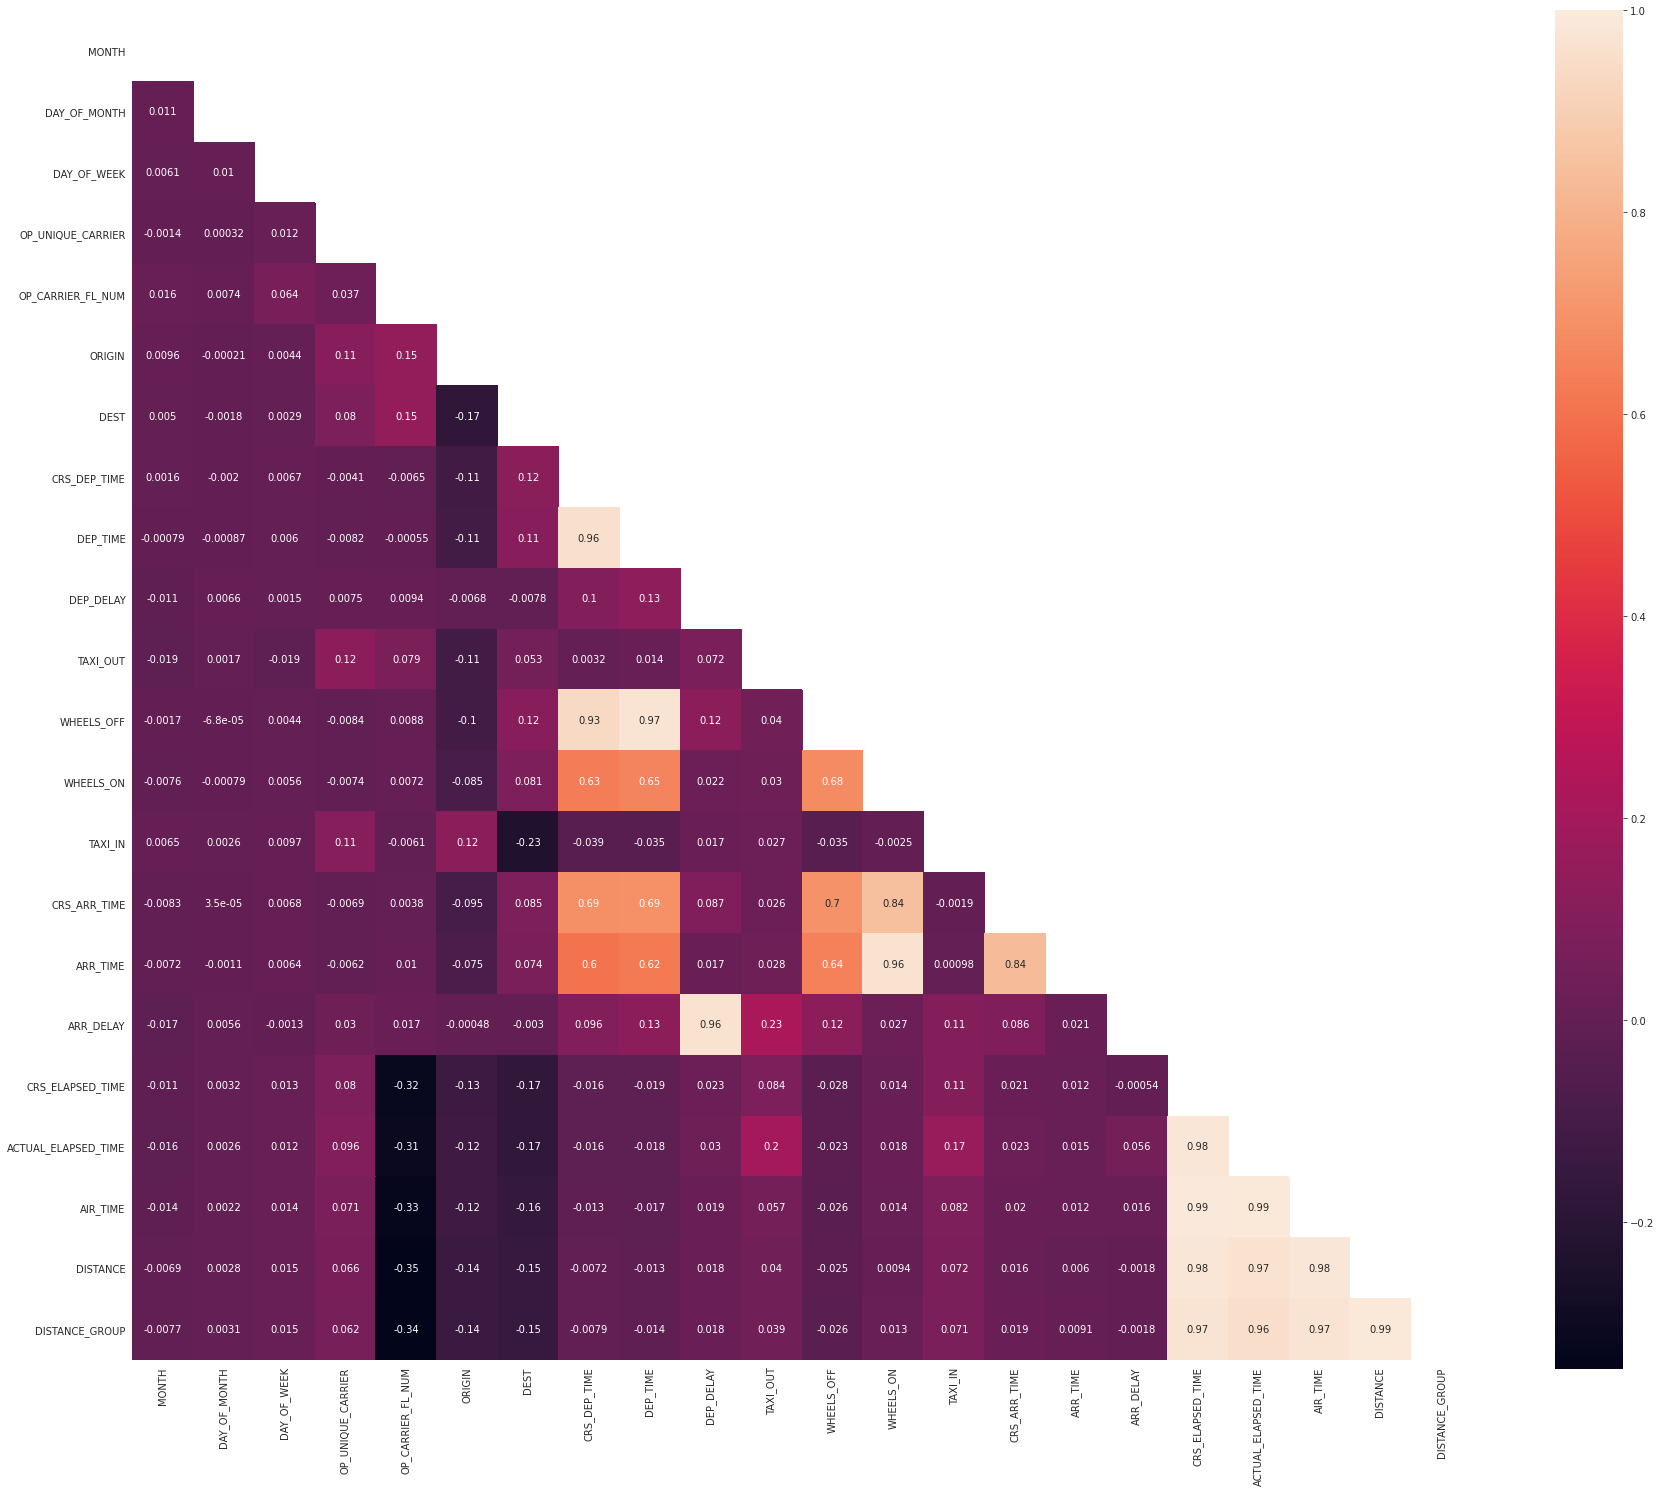

In [ ]:
df2_corr = df2.corr()
df2_corr
mask = np.zeros_like(df2_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f , ax = plt.subplots(figsize=(30,25))
    ax = sns.heatmap(df2_corr, mask=mask, vmax=1,annot=True, square=True)

We have some features have a high correlation (> 0,9). So we need to deal with them

First, we find a pair that have corr > 0.9, Then compare each to target feature(ARR_DELAY), remove the feature that have lower correlation with target feature.

In [ ]:
df3_corr = df2_corr.copy()

Find a correct index of target feature(manually)

In [ ]:
df3_corr.index[16]

'ARR_DELAY'

We write code to apply the hypothesis above

In [ ]:
feature_remove = set()
condition = (df3_corr > 0.9) & (df3_corr != 1)
for i in range(len(df3_corr)):
  for j in range(len(df3_corr)):
    if condition.iloc[i][j] == True:
    # if i != j and df3_corr.iloc[i][j] >= :0.9
      print(df3_corr.index[i])
      print(df3_corr.index[j])
      if df3_corr.iloc[i][16] >= df3_corr.iloc[j][16]:
        print("choose:", df3_corr.index[i])
        print('------------------------')
        if j != 16:
          feature_remove.add(df3_corr.index[j])
      else:
        if i != 16:
          feature_remove.add(df3_corr.index[i])
        print("choose:", df3_corr.index[j])
        print('------------------------')

In [ ]:
feature_remove = list(feature_remove)
feature_remove

['DISTANCE_GROUP',
 'CRS_DEP_TIME',
 'DEP_DELAY',
 'AIR_TIME',
 'ARR_TIME',
 'DISTANCE',
 'WHEELS_OFF',
 'CRS_ELAPSED_TIME']

Drop features

In [ ]:
df4_corr = df3_corr.drop(feature_remove)
df4_corr = df4_corr[df3_corr.index.drop(feature_remove)]
df4_corr

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,TAXI_OUT,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,ACTUAL_ELAPSED_TIME
MONTH,1.000000,0.010950,0.006090,-0.001374,0.016436,0.009641,0.005007,-0.000792,-0.019425,-0.007645,0.006492,-0.008257,-0.016889,-0.015755
DAY_OF_MONTH,0.010950,1.000000,0.010097,0.000316,0.007403,-0.000213,-0.001766,-0.000868,0.001692,-0.000788,0.002636,0.000035,0.005561,0.002623
DAY_OF_WEEK,0.006090,0.010097,1.000000,0.011650,0.064466,0.004396,0.002891,0.005987,-0.019371,0.005596,0.009726,0.006755,-0.001276,0.011548
OP_UNIQUE_CARRIER,-0.001374,0.000316,0.011650,1.000000,0.037265,0.112905,0.080226,-0.008205,0.124447,-0.007386,0.110491,-0.006949,0.029957,0.096130
OP_CARRIER_FL_NUM,0.016436,0.007403,0.064466,0.037265,1.000000,0.149328,0.151842,-0.000553,0.079134,0.007164,-0.006097,0.003763,0.016735,-0.310354
ORIGIN,0.009641,-0.000213,0.004396,0.112905,0.149328,1.000000,-0.173068,-0.106043,-0.108106,-0.084654,0.117978,-0.095092,-0.000482,-0.124740
DEST,0.005007,-0.001766,0.002891,0.080226,0.151842,-0.173068,1.000000,0.113246,0.052593,0.081204,-0.231530,0.084650,-0.002953,-0.168706
DEP_TIME,-0.000792,-0.000868,0.005987,-0.008205,-0.000553,-0.106043,0.113246,1.000000,0.014412,0.653763,-0.034773,0.689878,0.129328,-0.017613
TAXI_OUT,-0.019425,0.001692,-0.019371,0.124447,0.079134,-0.108106,0.052593,0.014412,1.000000,0.030260,0.027151,0.025923,0.226091,0.196198
WHEELS_ON,-0.007645,-0.000788,0.005596,-0.007386,0.007164,-0.084654,0.081204,0.653763,0.030260,1.000000,-0.002488,0.843788,0.026805,0.017869


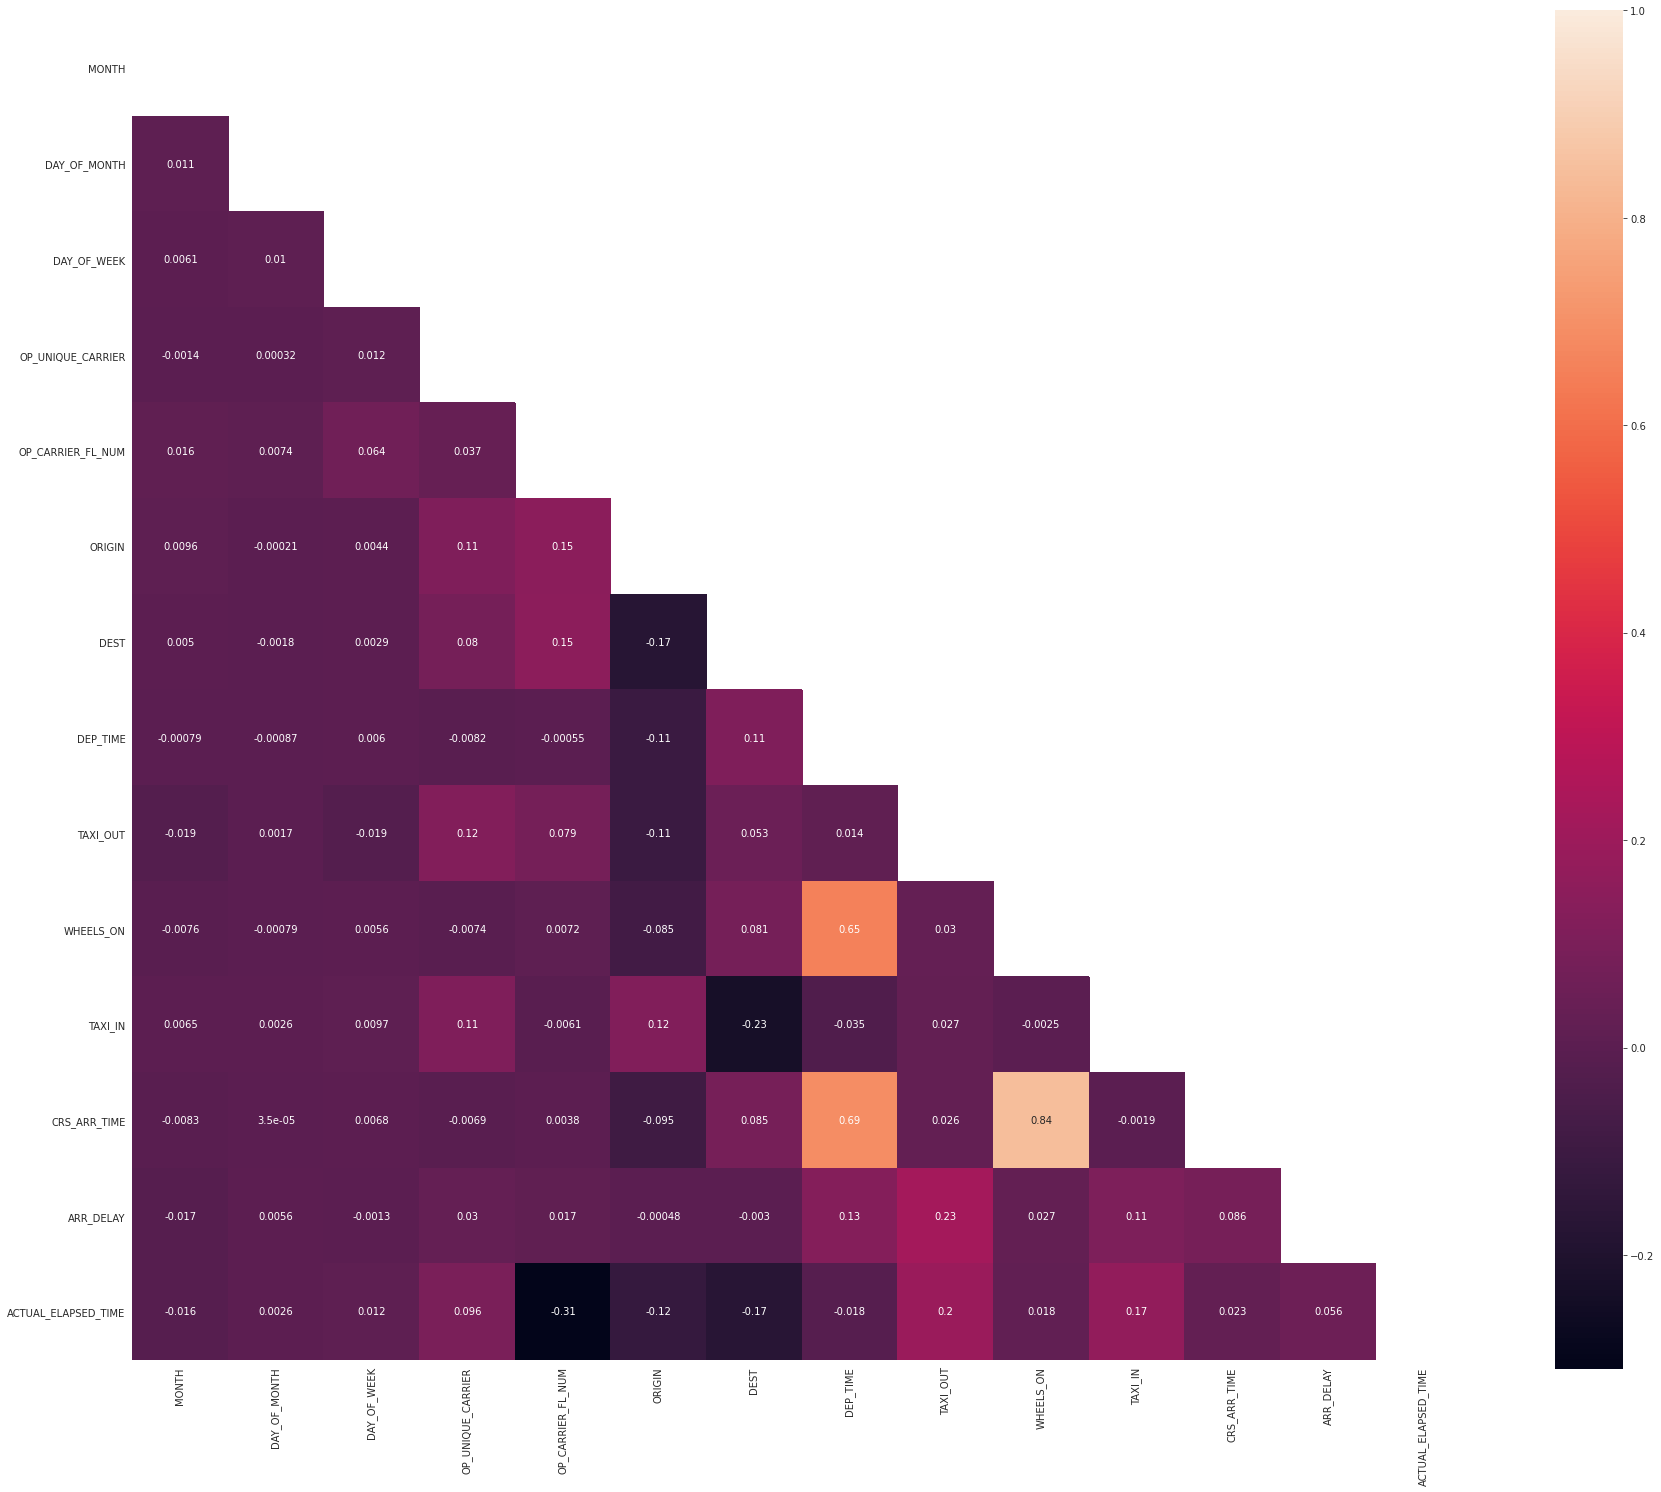

In [ ]:
mask = np.zeros_like(df4_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f , ax = plt.subplots(figsize=(30,25))
    ax = sns.heatmap(df4_corr, mask=mask, vmax=1,annot=True, square=True)

In [ ]:
#feature_remove.add('DEP_DELAY')

Drop features

In [ ]:
df2 = df2.drop(feature_remove, axis=1)
df2

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,TAXI_OUT,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,ACTUAL_ELAPSED_TIME
0,1,23,3,0,796,0,0,1443.0,20.0,1648.0,7.0,1610,45.0,72.0
1,1,2,3,1,438,1,1,1511.0,12.0,1826.0,26.0,1843,9.0,161.0
2,1,2,3,0,6708,0,2,4.0,7.0,108.0,4.0,2325,107.0,68.0
3,1,23,3,0,660,2,3,2303.0,26.0,26.0,5.0,2255,96.0,88.0
4,1,9,3,2,3344,3,4,1009.0,75.0,1351.0,3.0,1342,12.0,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145354,12,16,1,12,1460,43,138,1604.0,15.0,1845.0,5.0,1848,2.0,166.0
145355,12,31,2,0,19,45,74,1128.0,12.0,1225.0,2.0,1240,-13.0,59.0
145356,12,20,5,5,2625,14,2,2355.0,9.0,158.0,4.0,220,-18.0,127.0
145357,12,14,6,3,2783,209,7,604.0,13.0,721.0,10.0,739,-8.0,87.0


##FIND OUTLIER

Recall that the method to claim that the value not an outlier is:

Q1 - 1.5*IQR <= x <= Q3+ 1.5*IQR

with IQR = Q3 - Q1

In [ ]:
df2_temp = df2.drop('ARR_DELAY',axis=1)

In [ ]:
Q1 = df2_temp.quantile(0.25)
Q3 = df2_temp.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MONTH                     6.0
DAY_OF_MONTH             15.0
DAY_OF_WEEK               4.0
OP_UNIQUE_CARRIER         6.0
OP_CARRIER_FL_NUM      2881.0
ORIGIN                   52.0
DEST                     59.0
DEP_TIME                830.0
TAXI_OUT                  9.0
WHEELS_ON               868.0
TAXI_IN                   5.0
CRS_ARR_TIME            819.0
ACTUAL_ELAPSED_TIME      83.0
dtype: float64


In [ ]:
count_outlier = []

for i in range(len(IQR)):
  index = df2[(df2[IQR.index[i]] < (Q1[i] - 1.5 * IQR[i])) |
              (df2[IQR.index[i]] > (Q3[i] + 1.5 * IQR[i]))].index
  count_outlier.append(len(index))

percent = []
for count in count_outlier:
    percent.append(100*(count/(df2.shape[0])))

In [ ]:
outlier = pd.DataFrame({'count': count_outlier, 'percent':percent}, index=IQR.index)

In [ ]:
outlier

,count,percent
MONTH,0,0.000000
DAY_OF_MONTH,0,0.000000
DAY_OF_WEEK,0,0.000000
OP_UNIQUE_CARRIER,0,0.000000
OP_CARRIER_FL_NUM,0,0.000000
ORIGIN,12454,8.567753
DEST,8119,5.585481
DEP_TIME,0,0.000000
TAXI_OUT,8551,5.882677
WHEELS_ON,0,0.000000


We are ready to remove outlier features

In [ ]:
for i in range(len(IQR)):
    index = list(df2[(df2[IQR.index[i]] < (Q1[i] - 1.5 * IQR[i])) |
              (df2[IQR.index[i]] > (Q3[i] + 1.5 * IQR[i]))].index)
    df2.drop(index,inplace=True)

In [ ]:
df2.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,TAXI_OUT,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,ACTUAL_ELAPSED_TIME
count,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000
mean,6.597568,15.700838,3.932272,5.326626,2430.242205,36.739924,45.049685,1333.459687,15.497231,1456.438979,6.513684,1483.953966,2.157439,127.224631
std,3.405015,8.754925,1.998589,4.387858,1728.907056,32.586817,39.986500,507.752733,5.890984,537.138633,3.189466,522.474277,46.474452,55.323286
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-65.000000,22.000000
25%,4.000000,8.000000,2.000000,2.000000,1006.000000,13.000000,13.000000,914.000000,11.000000,1043.000000,4.000000,1102.000000,-16.000000,83.000000
50%,7.000000,16.000000,4.000000,5.000000,2048.000000,28.000000,32.000000,1323.000000,14.000000,1456.000000,6.000000,1510.000000,-8.000000,117.000000
75%,10.000000,23.000000,6.000000,9.000000,3628.000000,58.000000,67.000000,1746.000000,19.000000,1906.000000,8.000000,1915.000000,4.000000,160.000000
max,12.000000,31.000000,7.000000,16.000000,7435.000000,143.000000,160.000000,2400.000000,33.000000,2400.000000,16.000000,2400.000000,1284.000000,291.000000


##Check numbers of delay flights

In [ ]:
len(df2.ARR_DELAY[df2.ARR_DELAY > 30])

10418

##Create boolean feature (LATE)





Create boolean feature that will be 0 if ARR_DELAY < 30, 1 otherwise.

In [ ]:
df3 = df2.copy()

df3['LATE'] = (df3.ARR_DELAY > 30) * 1 #convert True/False to 0/1 by multiply it by 1
df3['LATE']

0         1
2         1
3         1
5         0
6         0
         ..
145352    0
145354    0
145355    0
145356    0
145358    0
Name: LATE, Length: 104358, dtype: int64

In [ ]:
df3

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,TAXI_OUT,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,ACTUAL_ELAPSED_TIME,LATE
0,1,23,3,0,796,0,0,1443.0,20.0,1648.0,7.0,1610,45.0,72.0,1
2,1,2,3,0,6708,0,2,4.0,7.0,108.0,4.0,2325,107.0,68.0,1
3,1,23,3,0,660,2,3,2303.0,26.0,26.0,5.0,2255,96.0,88.0,1
5,1,20,7,3,2612,4,5,1419.0,13.0,1711.0,6.0,1722,-5.0,178.0,0
6,1,22,2,1,554,5,6,1858.0,16.0,2219.0,8.0,2241,-14.0,149.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145352,12,1,7,9,604,28,6,1038.0,10.0,1205.0,6.0,1230,-19.0,93.0,0
145354,12,16,1,12,1460,43,138,1604.0,15.0,1845.0,5.0,1848,2.0,166.0,0
145355,12,31,2,0,19,45,74,1128.0,12.0,1225.0,2.0,1240,-13.0,59.0,0
145356,12,20,5,5,2625,14,2,2355.0,9.0,158.0,4.0,220,-18.0,127.0,0


##Drop ARR_DELAY feature

Since we already have the boolean feature represent late flight, no need to keep ARR_DELAY anymore

In [ ]:
df3 = df3.drop('ARR_DELAY', axis=1)
df3

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,TAXI_OUT,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ACTUAL_ELAPSED_TIME,LATE
0,1,23,3,0,796,0,0,1443.0,20.0,1648.0,7.0,1610,72.0,1
2,1,2,3,0,6708,0,2,4.0,7.0,108.0,4.0,2325,68.0,1
3,1,23,3,0,660,2,3,2303.0,26.0,26.0,5.0,2255,88.0,1
5,1,20,7,3,2612,4,5,1419.0,13.0,1711.0,6.0,1722,178.0,0
6,1,22,2,1,554,5,6,1858.0,16.0,2219.0,8.0,2241,149.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145352,12,1,7,9,604,28,6,1038.0,10.0,1205.0,6.0,1230,93.0,0
145354,12,16,1,12,1460,43,138,1604.0,15.0,1845.0,5.0,1848,166.0,0
145355,12,31,2,0,19,45,74,1128.0,12.0,1225.0,2.0,1240,59.0,0
145356,12,20,5,5,2625,14,2,2355.0,9.0,158.0,4.0,220,127.0,0


##Plot Distribution


Check the distribution of features

In [ ]:
def histplot(data, nums_feature):
  ''' data: dataframe
  nums_feature: number of features (must be even) '''
  w = int(nums_feature / 2)
  fig,ax = plt.subplots(w, 2, figsize=(12,12)) 
  i=0 
  for x in range(w):
      for y in range(2):
          sns.histplot(data[data.columns[i]], ax = ax[x,y])
          i += 1
  plt.tight_layout()
  plt.show()

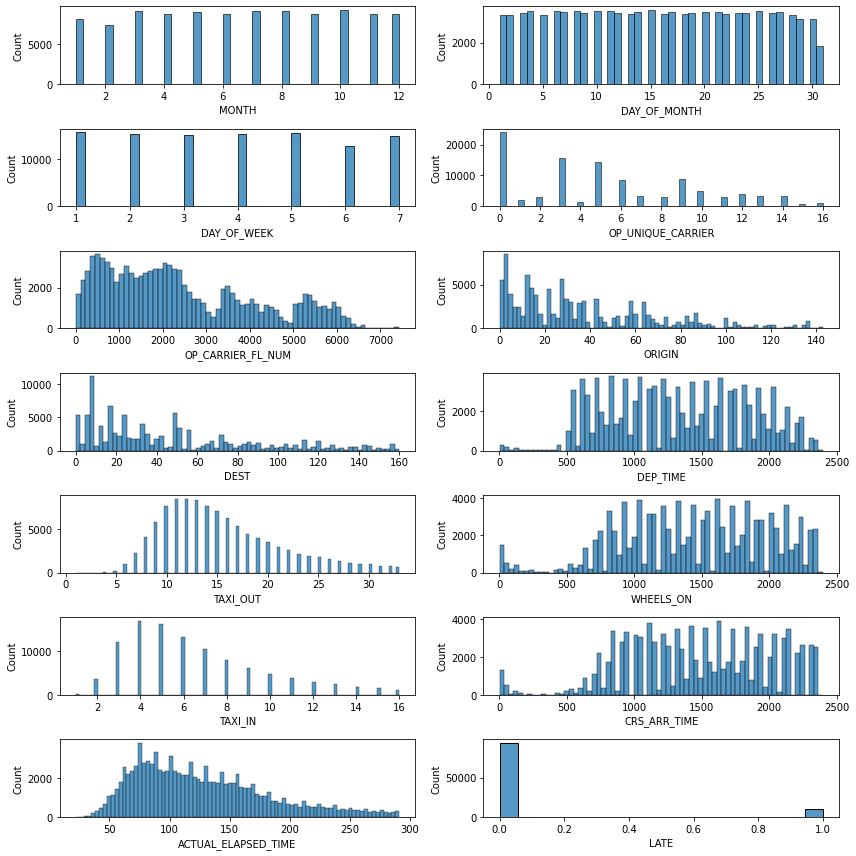

In [ ]:
histplot(df3, 14)

We can see that all of them is not normal distribution, we will transfrom all of them except the target feature

***We also transfrom some category features like months, days.... because it will not affect too much about its distribution, when transform, the module also normalize all feature values to the acceptable range (not too far from -1,1), so that we dont have to normalize them later.

In [ ]:
df_temp = df3.drop('LATE', axis=1)

feature_temp = []
for i in df_temp:
  feature_temp.append(list(df_temp[i]))

df_temp

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,TAXI_OUT,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ACTUAL_ELAPSED_TIME
0,1,23,3,0,796,0,0,1443.0,20.0,1648.0,7.0,1610,72.0
2,1,2,3,0,6708,0,2,4.0,7.0,108.0,4.0,2325,68.0
3,1,23,3,0,660,2,3,2303.0,26.0,26.0,5.0,2255,88.0
5,1,20,7,3,2612,4,5,1419.0,13.0,1711.0,6.0,1722,178.0
6,1,22,2,1,554,5,6,1858.0,16.0,2219.0,8.0,2241,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145352,12,1,7,9,604,28,6,1038.0,10.0,1205.0,6.0,1230,93.0
145354,12,16,1,12,1460,43,138,1604.0,15.0,1845.0,5.0,1848,166.0
145355,12,31,2,0,19,45,74,1128.0,12.0,1225.0,2.0,1240,59.0
145356,12,20,5,5,2625,14,2,2355.0,9.0,158.0,4.0,220,127.0


###Transform features using box-cox method





We have to add a number to array in order to prevent zero-values that will prevent transformation

In this case, we choose 0.001

In [ ]:
feature_norm = []
for i in range(len(feature_temp)):
  temp = np.array(feature_temp[i]).reshape(-1,1)
  bc = PowerTransformer(method='box-cox')
  transform_model = bc.fit(temp + 0.001) # 0.001 was added to avoid zero-values that will prevent transformation
  temp = transform_model.transform(temp + 1)
  feature_norm.append(temp)

In [ ]:
feature_norm = np.array(feature_norm)
feature_norm = np.squeeze(feature_norm)

##Milestone df_final

In [ ]:
df_final = df3.copy()

Add new values after transform to df_final

In [ ]:
i=0
for feature in df_temp:
  df_final[feature] = feature_norm[i]
  i += 1

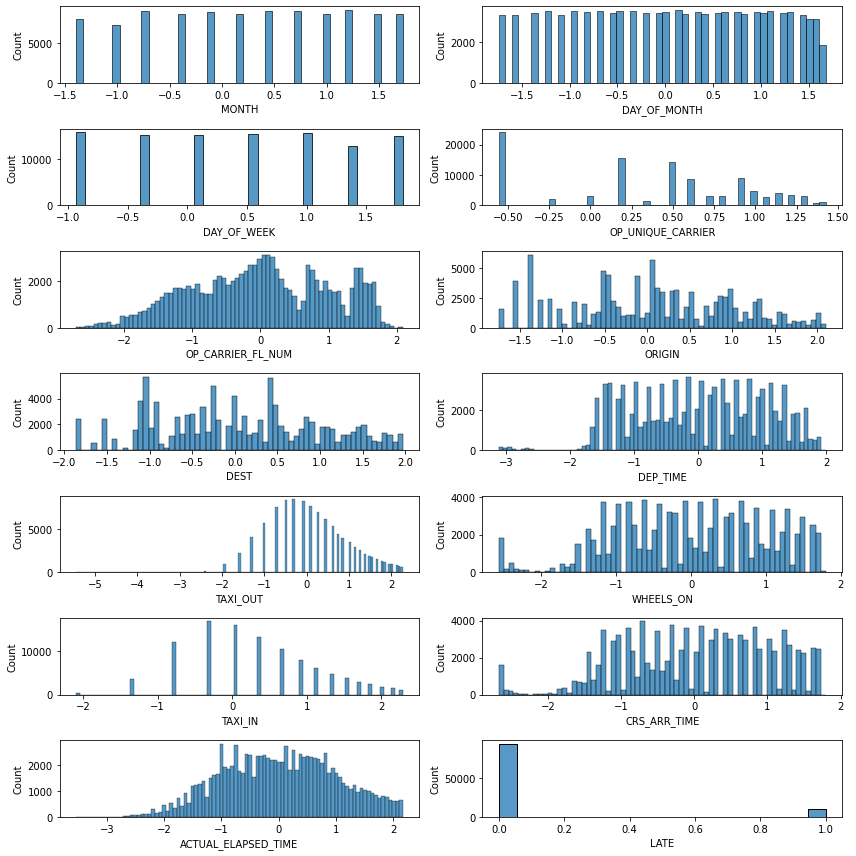

In [ ]:
histplot(df_final, 14)

We can see that all value have a normal distribution shape

Check range of values 

In [ ]:
df_final

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,TAXI_OUT,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ACTUAL_ELAPSED_TIME,LATE
0,-1.394947,0.935816,0.124850,-0.554519,-0.935216,-1.749880,-1.862731,0.250453,1.002019,0.348595,0.646556,0.230314,-1.059558,1
2,-1.394947,-1.557271,0.124850,-0.554519,1.878470,-1.749880,-1.498534,-3.100913,-1.598275,-2.412815,-0.321853,1.645635,-1.184990,1
3,-1.394947,0.935816,0.124850,-0.554519,-1.081524,-1.372271,-1.377593,1.824038,1.668197,-2.535778,0.048987,1.505294,-0.614908,1
5,-1.394947,0.641319,1.808541,0.184716,0.319781,-1.139391,-1.185002,0.204414,-0.082276,0.468419,0.367276,0.449124,0.997751,0
6,-1.394947,0.838860,-0.375191,-0.227695,-1.208116,-1.045431,-1.104283,1.026491,0.438405,1.445524,0.895679,1.477268,0.583118,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145352,1.729546,-1.739104,1.808541,0.900113,-1.146811,0.080539,-1.104283,-0.547754,-0.732799,-0.483822,0.367276,-0.502344,-0.491295,0
145354,1.729546,0.229487,-0.935272,1.148847,-0.373269,0.500647,1.738465,0.555810,0.276115,0.724338,0.048987,0.696670,0.834418,0
145355,1.729546,1.675274,-0.375191,-0.554519,-2.452485,0.549245,0.886457,-0.366085,-0.281732,-0.446667,-1.329267,-0.483277,-1.494169,0
145356,1.729546,0.641319,1.014373,0.474363,0.326463,-0.468380,-1.498534,1.915295,-0.991054,-2.333715,-0.321853,-2.333461,0.214947,0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104358 entries, 0 to 145358
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                104358 non-null  float64
 1   DAY_OF_MONTH         104358 non-null  float64
 2   DAY_OF_WEEK          104358 non-null  float64
 3   OP_UNIQUE_CARRIER    104358 non-null  float64
 4   OP_CARRIER_FL_NUM    104358 non-null  float64
 5   ORIGIN               104358 non-null  float64
 6   DEST                 104358 non-null  float64
 7   DEP_TIME             104358 non-null  float64
 8   TAXI_OUT             104358 non-null  float64
 9   WHEELS_ON            104358 non-null  float64
 10  TAXI_IN              104358 non-null  float64
 11  CRS_ARR_TIME         104358 non-null  float64
 12  ACTUAL_ELAPSED_TIME  104358 non-null  float64
 13  LATE                 104358 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 11.9 MB


In [ ]:
df_final.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,TAXI_OUT,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ACTUAL_ELAPSED_TIME,LATE
count,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000,104358.000000
mean,0.292083,0.117249,0.489716,0.359216,0.000830,0.061675,0.053851,0.001985,0.191357,0.001864,0.353238,0.001917,0.021394,0.099829
std,0.956569,0.973923,0.910664,0.611726,0.999400,0.938581,0.940037,0.999827,0.930432,1.000078,0.857401,1.000083,0.991380,0.299774
min,-1.394947,-1.739104,-0.935272,-0.554519,-2.703705,-1.749880,-1.862731,-3.118311,-5.453086,-2.569061,-2.096802,-2.670131,-3.543737,0.000000
25%,-0.398296,-0.691119,-0.375191,0.001841,-0.735250,-0.518705,-0.682141,-0.802874,-0.497605,-0.783068,-0.321853,-0.745257,-0.745210,0.000000
50%,0.456813,0.229487,0.584516,0.474363,0.009057,0.080539,0.004310,0.018807,0.103057,-0.014482,0.367276,0.035989,0.027537,0.000000
75%,1.237483,0.935816,1.420926,0.900113,0.793706,0.836082,0.767338,0.820498,0.872167,0.841292,0.895679,0.828868,0.748580,0.000000
max,1.729546,1.675274,1.808541,1.426861,2.089304,2.101785,1.970051,1.993971,2.275332,1.797835,2.287106,1.796383,2.170033,1.000000


We can see that values of all features is quite ok since its range is acceptable.

In [ ]:
print('numbers of late flight:',len(df_final.LATE[df_final.LATE == 1]))
print("percent of flight late: %s" %(len(df_final.LATE[df_final.LATE == 1]) / len(df_final.LATE) * 100),'%')

numbers of late flight: 10418
percent of flight late: 9.982943329692022 %


recall that the original numbers of flight late is approx 17,000, but after remove outliers of other features, we just have 10418 samples.

precent of flight late is few compare to non-late flight.

In [ ]:
df_final.to_csv('/content/drive/My Drive/report-airline/report3',index=False)

#MODELING

##Preprocessing Data

In [ ]:
df_final = pd.read_csv('/content/drive/My Drive/report-airline/report3')

In [ ]:
df_final

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,TAXI_OUT,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ACTUAL_ELAPSED_TIME,LATE
0,-1.394947,0.935816,0.124850,-0.554519,-0.935216,-1.749880,-1.862731,0.250453,1.002019,0.348595,0.646556,0.230314,-1.059558,1
1,-1.394947,-1.557271,0.124850,-0.554519,1.878470,-1.749880,-1.498534,-3.100913,-1.598275,-2.412815,-0.321853,1.645635,-1.184990,1
2,-1.394947,0.935816,0.124850,-0.554519,-1.081524,-1.372271,-1.377593,1.824038,1.668197,-2.535778,0.048987,1.505294,-0.614908,1
3,-1.394947,0.641319,1.808541,0.184716,0.319781,-1.139391,-1.185002,0.204414,-0.082276,0.468419,0.367276,0.449124,0.997751,0
4,-1.394947,0.838860,-0.375191,-0.227695,-1.208116,-1.045431,-1.104283,1.026491,0.438405,1.445524,0.895679,1.477268,0.583118,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104353,1.729546,-1.739104,1.808541,0.900113,-1.146811,0.080539,-1.104283,-0.547754,-0.732799,-0.483822,0.367276,-0.502344,-0.491295,0
104354,1.729546,0.229487,-0.935272,1.148847,-0.373269,0.500647,1.738465,0.555810,0.276115,0.724338,0.048987,0.696670,0.834418,0
104355,1.729546,1.675274,-0.375191,-0.554519,-2.452485,0.549245,0.886457,-0.366085,-0.281732,-0.446667,-1.329267,-0.483277,-1.494169,0
104356,1.729546,0.641319,1.014373,0.474363,0.326463,-0.468380,-1.498534,1.915295,-0.991054,-2.333715,-0.321853,-2.333461,0.214947,0


create dicts to store the result of f1score and recall of algorithms

In [ ]:
f1score_plot = dict()
recall_plot = dict()

We write a function that seperate data into train, test set.

In [ ]:
#divide train-test set
def preprocessing(df_final):
  '''
  return set of arrays, include:
  feature_train
  feature_test
  target_train
  target_test
  train_dataset
  test_dataset
   '''
  train_dataset = df_final.sample(frac=0.9, random_state=0)
  test_dataset = df_final.drop(train_dataset.index)
  #divide target and features
  target_train = np.array(train_dataset['LATE'])
  feature_train = list()
  target_test = np.array(test_dataset['LATE'])
  feature_test = list()
  for i in df_final:
      if i != 'LATE':
          feature_train.append(list(train_dataset[i]))
          feature_test.append(list(test_dataset[i]))
  return feature_train, feature_test, target_train, target_test, train_dataset, test_dataset

We write a function to decide with dataset we choose: big or small dataset

Big dataset: this is the original data

Small dataset: this is the data that we drop many samples

Because with some algorithms, searching optimize hyperparameters can cost a lot of time, so we will searching with the small dataset, it might not as accuracy as using the big dataset, but it will reduce a lot of time.

Recall that:

1.   numbers of late flight: 10418
2.   percent of flight late: 9.982943329692022 %

We will make the small dataset = 0.1 * big dataset

In [ ]:
def choose_dataset(df_final, type_data):

  '''
  df_final: original dataset
  type_data: {'big', 'small'}, 'big' using the original data, 'small' drop many samples that label LATE feature = 0.
  '''


  if type_data == 'big':
    feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = preprocessing(df_final)
    #transpose
    feature_train = np.array(feature_train).transpose()
    feature_test = np.array(feature_test).transpose()
    
    print('feature train shape:', feature_train.shape)
    print('target train shape:', target_train.shape)
    print('feature test shape:', feature_test.shape)
    print('target test shape:', target_test.shape)
    print('number of train late:',len(train_dataset.LATE[train_dataset.LATE == 1]))
    print('number of test late:',len(test_dataset.LATE[test_dataset.LATE == 1]))

  if type_data == 'small':

    new_df = df_final.sample(frac=0.1, random_state=1)
    
    # without_late = df_final[df_final.LATE == 0]
    # with_late = df_final[df_final.LATE == 1]
    # without_late = without_late.sample(frac=0.055, random_state=1)
    # new_df = pd.concat([without_late, with_late])

    feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = preprocessing(new_df)
    #transpose
    feature_train = np.array(feature_train).transpose()
    feature_test = np.array(feature_test).transpose()
    
    print('feature train shape:', feature_train.shape)
    print('target train shape:', target_train.shape)
    print('feature test shape:', feature_test.shape)
    print('target test shape:', target_test.shape)
    print('number of train late:',len(train_dataset.LATE[train_dataset.LATE == 1]))
    print('number of test late:',len(test_dataset.LATE[test_dataset.LATE == 1]))

  return (feature_train, feature_test, target_train, target_test, train_dataset, test_dataset)

##Logistic Regression

Use for display progress bar while training

In [ ]:
stdout = sys.stdout
sys.stdout = open('junk','w')
deepreload.reload(tqdm)
sys.stdout = stdout

tqdm_callback = tfa.callbacks.TQDMProgressBar()
tqdm.__version__

'4.41.1'

###Using big dataset

In [ ]:
feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = choose_dataset(df_final,'big')

feature train shape: (93922, 13)
target train shape: (93922,)
feature test shape: (10436, 13)
target test shape: (10436,)
number of train late: 9405
number of test late: 1013


Building model logistic

***note that we just add more layers (Neural Network) to help model find loss fasters, base algorithms is in last layer, we use SIGMOID to category it to (0,1)

after that we compile this model with optimizers Adam (just a optimizer), for loss function, we use BINARY CROSS ENTROPY, this is the entropy algorithm that can distinct binary label.

In [ ]:
model_logistic = tf.keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='sigmoid'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

Optimizers: Adam

Loss: BCE

In [ ]:
model_logistic.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss= tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']) #display metrics

In [ ]:
history_linear = model_logistic.fit(
    feature_train, target_train,
    epochs = 30,
    verbose = 0, #not show details since we already use tqdm
    validation_split = 0.1, #split to validation set
    callbacks=[tqdm_callback]) #display progress bar

Epoch 1/30



Epoch 2/30



Epoch 3/30



Epoch 4/30



Epoch 5/30



Epoch 6/30



Epoch 7/30



Epoch 8/30



Epoch 9/30



Epoch 10/30



Epoch 11/30



Epoch 12/30



Epoch 13/30



Epoch 14/30



Epoch 15/30



Epoch 16/30



Epoch 17/30



Epoch 18/30



Epoch 19/30



Epoch 20/30



Epoch 21/30



Epoch 22/30



Epoch 23/30



Epoch 24/30



Epoch 25/30



Epoch 26/30



Epoch 27/30



Epoch 28/30



Epoch 29/30



Epoch 30/30


In [ ]:
hist_linear = pd.DataFrame(history_linear.history)
hist_linear['epoch'] = history_linear.epoch
hist_linear.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
25,0.059063,0.971501,0.062074,0.969978,25
26,0.058821,0.971383,0.062217,0.970616,26
27,0.058631,0.971252,0.061654,0.969871,27
28,0.058412,0.971335,0.061625,0.970191,28
29,0.057884,0.971371,0.060808,0.971149,29


Write a function to plot loss values

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

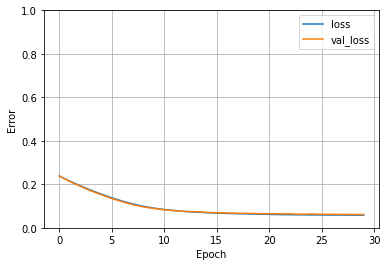

In [ ]:
plot_loss(history_linear)

We can see that the shape of chart is very good, model found a local optima in just a few epochs.

In [ ]:
model_logistic.evaluate(feature_test, target_test, callbacks=[tqdm_callback], verbose=0)

[0.054097022861242294, 0.9738405346870422]

Accuracy in test set is 97,3%. It's pretty good model since the percent is more than 95%.


####Check with F1 score

Recall that the number of late flights is small (10% in total). So that we need to check if there is any trick the model created. Because we can see that the model could be easily to find a local optima that just ignore all the late flights.

for example: if we just predict 0 all the time, the accuracy still more than 90% since the flight late is just 10%.

So that we have to use another method to critic the model: F1 score

In [ ]:
def cal_f1score(model):
  predict_binary = model.predict(feature_test)
  predict_binary = np.squeeze(predict_binary).round()
  precision, recall = f1_score(target_test, predict_binary, average=None)

  print('precision:', precision)
  print('recall:', recall)

  F1_score = (2 * precision * recall) / (precision + recall)
  print('f1_score:', F1_score)
  return F1_score, recall

In [ ]:
cal_f1score(model_logistic)

precision: 0.9855440826052423
recall: 0.8626069451434324
f1_score: 0.9199866868411608


we just focus on recall. Recall is a method that calculate the precent of a value, compare to all possible value

So that if we see recall = 0. It mean that model predict just 1 value, and it will be value 0.

our target is to predict if a flight late of not, so that this model, although have a very good percent, but failed to predict a late flight.

F1_score is used for compare models.

F1_score = 0 mean model is failed to predict.

###Modifiy Threshold

In [ ]:
predict_binary = model_logistic.predict(feature_test)

In [ ]:
import itertools

def plot_confuse_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def plot_predicted(predict_test, target_test):
  classes = [0,1]
  threshold = np.linspace(0, 0.5, 12)
  j = 1
  k = 0
  plt.figure(figsize=(10,10))
  temp = []
  temp_i = []
  temp_recall = []
  for i in threshold:
    plt.subplot(4,3,j)
    j += 1
    predict_binary = predict_test.copy()
    predict_binary[predict_binary >= i] = 1
    predict_binary[predict_binary < 1] = 0
    cnf_matrix = confusion_matrix(target_test, predict_binary)
    tn, fp, fn, tp = confusion_matrix(target_test, predict_binary).ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * ( (precision * recall) / (precision + recall) )
    temp.append(f1_score)
    temp_i.append(i)
    temp_recall.append(recall)

    if len(temp) > 1:
      if temp[1] <= temp[0]:
        temp.pop(1)
        temp_i.pop(1)
        temp_recall.pop(1)
      else:
        temp.pop(0)
        temp_i.pop(0)
        temp_recall.pop(0)

    print("recall: ", recall,"|", "f1_score: ", f1_score)
    #print("f1_score metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    plot_confuse_matrix(cnf_matrix, classes=classes, normalize=False, title='Threshold >= %s' %i, cmap=plt.cm.Blues)
  print('Best threshold: ', np.around(temp_i[0],decimals=3))
  print('Best Recall: ', np.around(temp_recall[0],decimals=3))
  print('Best F1_score: ', np.around(temp[0],decimals=3))
  
  return np.around(temp[0],decimals=3), np.around(temp_recall[0],decimals=3)

number of late flight in test set:  1013
recall:  1.0 | f1_score:  0.17695868634815268
recall:  0.9970384995064165 | f1_score:  0.8295687885010267
recall:  0.9713721618953604 | f1_score:  0.8777876895628903
recall:  0.9496544916090819 | f1_score:  0.8825688073394495
recall:  0.926949654491609 | f1_score:  0.8800374882849109
recall:  0.9170779861796644 | f1_score:  0.8801515869256277
recall:  0.9042448173741362 | f1_score:  0.8761358201817313
recall:  0.8963474827245804 | f1_score:  0.875602700096432
recall:  0.8825271470878578 | f1_score:  0.8734733756717147
recall:  0.8696939782823297 | f1_score:  0.868836291913215
recall:  0.8548864758144127 | f1_score:  0.8655672163918041
recall:  0.8460019743336624 | f1_score:  0.8626069451434324
Best threshold:  0.136
Best Recall:  0.95
Best F1_score:  0.883


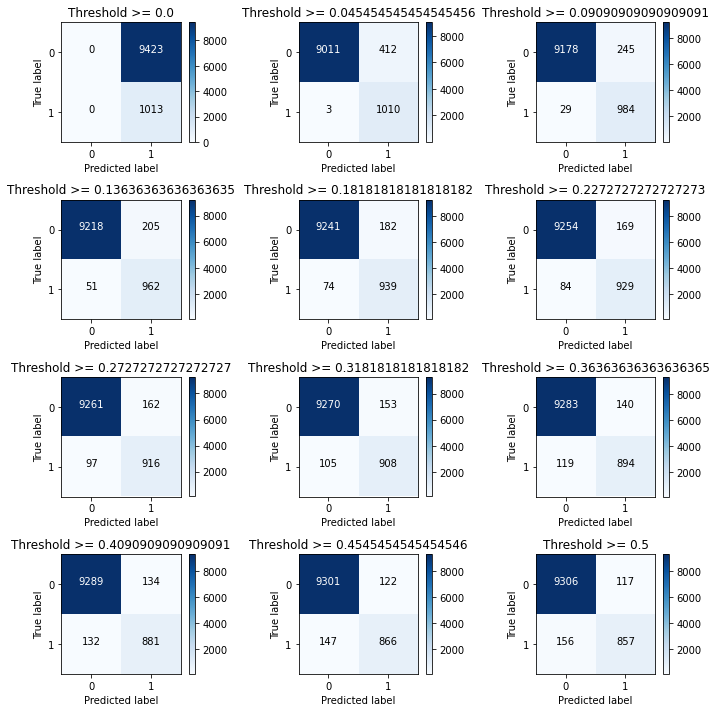

In [ ]:
print('number of late flight in test set: ', np.sum((target_test == 1)*1))
f1score_plot['b_logit'], recall_plot['b_logit'] = plot_predicted(predict_binary, target_test)

We will choose 

1.   Threshold:  0.136
2.   F1_score:  0.883
3.   Recall:  0.95



##GRIDSEARCHCV

With all the models later, we will test with gridsearchCV method to find a best hyperparameters for models.

##RANDOM FOREST

###Using big dataset

As usual, we will test with a big dataset

In [ ]:
feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = choose_dataset(df_final,'big')

feature train shape: (93922, 13)
target train shape: (93922,)
feature test shape: (10436, 13)
target test shape: (10436,)
number of train late: 9405
number of test late: 1013


Create a randomforest model for classification

In [ ]:
clf = RandomForestClassifier(max_depth=10, random_state=0, verbose=5, oob_score=True,class_weight={0: 1, 1: 5})
clf.fit(feature_train, target_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s


building tree 5 of 100
building tree 6 of 100


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.1s remaining:    0.0s


building tree 7 of 100
building tree 8 of 100


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.4s remaining:    0.0s


building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.6s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 5},
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=10,
                       warm_start=False)

In [ ]:
print('score:',clf.oob_score_)

score: 0.9432081940333468


We have high score, but we need to apply F1 score to check

####Check with F1 score

In [ ]:
cal_f1score(clf)

precision: 0.9691127694859037
recall: 0.6218274111675126
f1_score: 0.7575657361690306


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Recall is small, we will apply gridsearchcv to find optimal hyperparameters

####Apply GridsearchCV

In [ ]:
clf = RandomForestClassifier()
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [16, 18],
              'class_weight':['balanced', 'balanced_subsample',{0:1,1:3},{0:1,1:7}]
                 }
grid_GBR = GridSearchCV(estimator=clf, param_grid = parameters, cv = 2, n_jobs=-1, verbose=10)
#estimator: module
#param_grid: hyperparameters set
#cv = 2 mean it have 2 validation set, so the amount of tasks will be multiply by 2
#n_jobs = -1 mean it will run parallel
grid_GBR.fit(feature_train, target_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  4.2min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

Check parameters

In [ ]:
print('score:',grid_GBR.best_score_)
print('parameters:',grid_GBR.best_params_)

score: 0.9564958156768382
parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 16}


####Check with F1 score

In [ ]:
f1score_plot['b_forest'], recall_plot['b_forest'] = cal_f1score(grid_GBR)

precision: 0.9799968663498198
recall: 0.7779710144927536
f1_score: 0.8673755244589281


##GRADIENT BOOSTING

###Using big dataset

In [ ]:
feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = choose_dataset(df_final,'big')

feature train shape: (93922, 13)
target train shape: (93922,)
feature test shape: (10436, 13)
target test shape: (10436,)
number of train late: 9405
number of test late: 1013


we will train a default parameters of gradient boosting model

In [ ]:
clf = GradientBoostingClassifier(random_state=0,verbose = 5)
clf.fit(feature_train, target_train)

      Iter       Train Loss   Remaining Time 
         1           0.6197           27.09s
         2           0.6048           26.79s
         3           0.5936           26.38s
         4           0.5828           26.22s
         5           0.5741           26.02s
         6           0.5692           25.84s
         7           0.5641           25.54s
         8           0.5604           25.33s
         9           0.5573           25.05s
        10           0.5544           24.78s
        11           0.5519           24.51s
        12           0.5484           24.20s
        13           0.5464           23.91s
        14           0.5440           23.59s
        15           0.5413           23.35s
        16           0.5306           23.12s
        17           0.5282           22.84s
        18           0.5203           22.53s
        19           0.5187           22.28s
        20           0.5147           22.00s
        21           0.5078           21.72s
        2

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=5,
                           warm_start=False)

In [ ]:
print('train set score:', clf.score(feature_train, target_train))
print('test set score:', clf.score(feature_test, target_test))

train set score: 0.9474138114605737
test set score: 0.9449980835569184


####Check with F1 score

In [ ]:
cal_f1score(clf)

precision: 0.9704306614465279
recall: 0.6068493150684932
f1_score: 0.7467351275471946


(0.7467351275471946, 0.6068493150684932)

###Using small dataset to apply GRIDSEARCHCV

In [ ]:
feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = choose_dataset(df_final,'small')

feature train shape: (9392, 13)
target train shape: (9392,)
feature test shape: (1044, 13)
target test shape: (1044,)
number of train late: 940
number of test late: 111


In [ ]:
clf = GradientBoostingClassifier()
parameters = {'loss': ['deviance', 'exponential'],
              'learning_rate': [0.05, 0.1, 0.15],
              #'n_estimators': [100, 150],
              'subsample': [0.5, 1],
              'criterion': ['friedman_mse', 'mse', 'mae'],
              #'max_depth': [3, 6],
              'max_features': ['auto','sqrt','log2']
}
grid_GBR = RandomizedSearchCV(estimator=clf, param_distributions = parameters, n_iter=15, cv = 2, n_jobs=-1, verbose=10)
#estimator: module
#param_grid: hyperparameters set
#cv = 2 mean it have 2 validation set, so the amount of tasks will be multiply by 2
#n_jobs = -1 mean it will run parallel
grid_GBR.fit(feature_train, target_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.9min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [ ]:
print('score:',grid_GBR.best_score_)
print('parameters:',grid_GBR.best_params_)

cal_f1score(grid_GBR)

score: 0.950063884156729
parameters: {'subsample': 1, 'max_features': 'auto', 'loss': 'deviance', 'learning_rate': 0.15, 'criterion': 'friedman_mse'}
precision: 0.9794844818516572
recall: 0.7914438502673797
f1_score: 0.875480905165978


(0.875480905165978, 0.7914438502673797)

We will keep tuning n_estimators and max_depth

In [ ]:
clf = GradientBoostingClassifier(subsample=1, max_features='auto',
                                 loss='deviance', learning_rate=0.15, criterion='mse')
parameters = {'n_estimators': [200,300,400],
              'max_depth': [6,12,18]
                 }
grid_GBR = GridSearchCV(estimator=clf, param_grid = parameters, cv = 2, n_jobs=-1, verbose=10)
#estimator: module
#param_grid: hyperparameters set
#cv = 2 mean it have 2 validation set, so the amount of tasks will be multiply by 2
#n_jobs = -1 mean it will run parallel
grid_GBR.fit(feature_train, target_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   55.3s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='mse', init=None,
                                                  learning_rate=0.15,
                                                  loss='deviance', max_depth=3,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
               

In [ ]:
print('score:',grid_GBR.best_score_)
print('parameters:',grid_GBR.best_params_)
print('-------------------------------')
cal_f1score(grid_GBR)

score: 0.96912265758092
parameters: {'max_depth': 6, 'n_estimators': 200}
-------------------------------
precision: 0.9899097185342539
recall: 0.9073170731707317
f1_score: 0.9468156284221653


(0.9468156284221653, 0.9073170731707317)

###Continue with big dataset

In [ ]:
feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = choose_dataset(df_final,'big')

feature train shape: (93922, 13)
target train shape: (93922,)
feature test shape: (10436, 13)
target test shape: (10436,)
number of train late: 9405
number of test late: 1013


In [ ]:
clf = GradientBoostingClassifier(subsample=1, n_estimators=200, max_features='auto',
                                 max_depth=6, loss='deviance', learning_rate=0.15, criterion='mse', verbose = 5)
clf.fit(feature_train, target_train)

      Iter       Train Loss   Remaining Time 
         1           0.5530            1.79m
         2           0.5049            1.78m
         3           0.4553            1.77m
         4           0.4294            1.77m
         5           0.4070            1.76m
         6           0.3841            1.74m
         7           0.3658            1.74m
         8           0.3475            1.73m
         9           0.3268            1.72m
        10           0.3102            1.71m
        11           0.2974            1.70m
        12           0.2844            1.69m
        13           0.2680            1.69m
        14           0.2559            1.68m
        15           0.2494            1.67m
        16           0.2450            1.66m
        17           0.2326            1.65m
        18           0.2272            1.64m
        19           0.2202            1.63m
        20           0.2165            1.62m
        21           0.2117            1.61m
        2

GradientBoostingClassifier(ccp_alpha=0.0, criterion='mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=6,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=5,
                           warm_start=False)

In [ ]:
print('train set score:', clf.score(feature_train, target_train))
print('test set score:', clf.score(feature_test, target_test))

train set score: 0.9998402930090926
test set score: 0.9911843618244538


In [ ]:
f1score_plot['b_gradboost'], recall_plot['b_gradboost'] = cal_f1score(clf)

precision: 0.9951338199513382
recall: 0.953204476093591
f1_score: 0.9737179764061417


##Naive Bayes

### Using big dataset

In [ ]:
feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = choose_dataset(df_final,'big')

feature train shape: (93922, 13)
target train shape: (93922,)
feature test shape: (10436, 13)
target test shape: (10436,)
number of train late: 9405
number of test late: 1013


In [ ]:
scaler_train = MinMaxScaler().fit(feature_train)
scaler_test = MinMaxScaler().fit(feature_test)
feature_train = scaler_train.transform(feature_train)
feature_test = scaler_test.transform(feature_test)

In [ ]:
clf = CategoricalNB()
clf.fit(feature_train, target_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

####Check with F1 score

In [ ]:
print('train set score:', clf.score(feature_train, target_train))
print('test set score:', clf.score(feature_test, target_test))

train set score: 0.8998743638338196
test set score: 0.9029321579149099


In [ ]:
f1score_plot['b_Naive'], recall_plot['b_Naive'] = cal_f1score(clf)

precision: 0.948990382194471
recall: 0.0
f1_score: 0.0


Model become lazy while it just predict " 0 " all the time

##SVM

###Using big dataset

In [ ]:
feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = choose_dataset(df_final,'big')

feature train shape: (93922, 13)
target train shape: (93922,)
feature test shape: (10436, 13)
target test shape: (10436,)
number of train late: 9405
number of test late: 1013


In [ ]:
clf = SVC(max_iter=10000)
clf.fit(feature_train, target_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=10000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print('train set score:', clf.score(feature_train, target_train))
print('test set score:', clf.score(feature_test, target_test))

train set score: 0.9558569877132088
test set score: 0.9547719432732847


In [ ]:
cal_f1score(clf)

precision: 0.9755288262131896
recall: 0.7020202020202021
f1_score: 0.8164780070552243


(0.8164780070552243, 0.7020202020202021)

###Using small dataset to apply GRIDSEARCHCV

In [ ]:
feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = choose_dataset(df_final,'small')

feature train shape: (9392, 13)
target train shape: (9392,)
feature test shape: (1044, 13)
target test shape: (1044,)
number of train late: 940
number of test late: 111


In [ ]:
clf = SVC(max_iter=10000)
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale','auto']
                 }
grid_GBR = GridSearchCV(estimator=clf, param_grid = parameters, cv = 2, n_jobs=-1, verbose=10)
#estimator: module
#param_grid: hyperparameters set
#cv = 2 mean it have 2 validation set, so the amount of tasks will be multiply by 2
#n_jobs = -1 mean it will run parallel
grid_GBR.fit(feature_train, target_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   17.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=10000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [ ]:
grid_GBR.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
print('train set score:', grid_GBR.score(feature_train, target_train))
print('test set score:', grid_GBR.score(feature_test, target_test))

train set score: 0.929195059625213
test set score: 0.9032567049808429


###Continue with big dataset

In [ ]:
feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = choose_dataset(df_final,'big')

feature train shape: (93922, 13)
target train shape: (93922,)
feature test shape: (10436, 13)
target test shape: (10436,)
number of train late: 9405
number of test late: 1013


In [ ]:
clf = SVC(gamma='scale', kernel='rbf', max_iter=10000)
clf.fit(feature_train,target_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=10000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print('train set score:', clf.score(feature_train, target_train))
print('test set score:', clf.score(feature_test, target_test))

train set score: 0.9558569877132088
test set score: 0.9547719432732847


In [ ]:
f1score_plot['b_SVM'], recall_plot['b_SVM'] = cal_f1score(clf)

precision: 0.9755288262131896
recall: 0.7020202020202021
f1_score: 0.8164780070552243


##Plotting models

In [ ]:
f1score_plot

{'b_Naive': 0.0,
 'b_SVM': 0.8164780070552243,
 'b_forest': 0.8673755244589281,
 'b_gradboost': 0.9737179764061417,
 'b_logit': 0.883}

In [ ]:
recall_plot

{'b_Naive': 0.0,
 'b_SVM': 0.7020202020202021,
 'b_forest': 0.7779710144927536,
 'b_gradboost': 0.953204476093591,
 'b_logit': 0.95}

In [ ]:
df_models_f1score = pd.DataFrame({'f1score':list(f1score_plot.values())}, index=list(f1score_plot.keys()))
df_models_recall = pd.DataFrame({'recall':list(recall_plot.values())}, index=list(recall_plot.keys()))
df_models = pd.concat([df_models_f1score,df_models_recall], axis=1)

In [ ]:
df_models

,f1score,recall
b_logit,0.883000,0.950000
b_forest,0.867376,0.777971
b_gradboost,0.973718,0.953204
b_Naive,0.000000,0.000000
b_SVM,0.816478,0.702020


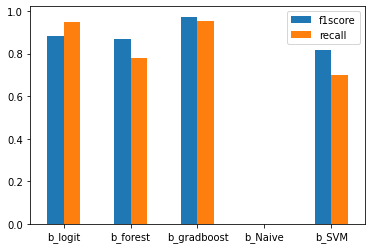

In [ ]:
df_models.plot.bar(rot=0)

We can see that Gradient Boosting have the most accuracy in both F1score and Recall value.

=> This problem work well in decision tree algorithm and gradient descent algorithm

So that we will choose Geadient Boosting model

##PCA, selectKbest and RFE

for this sector, we will use the base file that contain most feature

we will use the data before checking correlation and outlier

In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/report-airline/report2')

In [ ]:
df_test['LATE'] = (df_test.ARR_DELAY > 30) * 1
df_test = df_test.drop(['ARR_DELAY','DEP_DELAY'], axis=1)
df_test

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,LATE
0,1,23,3,0,796,0,0,1405,1443.0,20.0,1503.0,1648.0,7.0,1610,1655.0,65.0,72.0,45.0,228.0,1,1
1,1,2,3,1,438,1,1,1515,1511.0,12.0,1523.0,1826.0,26.0,1843,1852.0,148.0,161.0,123.0,896.0,4,0
2,1,2,3,0,6708,0,2,2200,4.0,7.0,11.0,108.0,4.0,2325,112.0,85.0,68.0,57.0,349.0,2,1
3,1,23,3,0,660,2,3,2125,2303.0,26.0,2329.0,26.0,5.0,2255,31.0,90.0,88.0,57.0,432.0,2,1
4,1,9,3,2,3344,3,4,1016,1009.0,75.0,1124.0,1351.0,3.0,1342,1354.0,206.0,225.0,147.0,1047.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145354,12,16,1,12,1460,43,138,1554,1604.0,15.0,1619.0,1845.0,5.0,1848,1850.0,174.0,166.0,146.0,1173.0,5,0
145355,12,31,2,0,19,45,74,1130,1128.0,12.0,1140.0,1225.0,2.0,1240,1227.0,70.0,59.0,45.0,239.0,1,0
145356,12,20,5,5,2625,14,2,2359,2355.0,9.0,4.0,158.0,4.0,220,202.0,141.0,127.0,114.0,852.0,4,0
145357,12,14,6,3,2783,209,7,605,604.0,13.0,617.0,721.0,10.0,739,731.0,94.0,87.0,64.0,363.0,2,0


We will use small dataset again to choose features

In [ ]:
feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = choose_dataset(df_test,'small')

feature train shape: (13082, 20)
target train shape: (13082,)
feature test shape: (1454, 20)
target test shape: (1454,)
number of train late: 1578
number of test late: 194


###RFE

RFE is a method that we have to fit a estimator. so that we will check with all posible estimator we used

In [ ]:
RFE_plot = dict()

1. Random Forest

In [ ]:
estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=13, step=1, verbose=10)
randomforest = selector.fit(feature_train, target_train)
randomforest.ranking_

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.


array([5, 4, 7, 6, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8])

2. Gradient Boosting

In [ ]:
estimator = GradientBoostingClassifier()
selector = RFE(estimator, n_features_to_select=13, step=1, verbose=10)
gradboost = selector.fit(feature_train, target_train)
gradboost.ranking_

Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.


array([8, 6, 9, 7, 2, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5])

3. Logistic Regression

In [ ]:
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=13, step=1, verbose=10)
logreg = selector.fit(feature_train, target_train)
logreg.ranking_

Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.


array([8, 6, 9, 7, 2, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4])

We can see that all estimator have the same result.

In [ ]:
arr = randomforest.support_
arr = np.append(arr,True)

df_rfe = df_test.loc[:, arr]
df_rfe

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,LATE
0,796,1405,1443.0,20.0,1503.0,1648.0,7.0,1610,1655.0,65.0,72.0,45.0,228.0,1
1,438,1515,1511.0,12.0,1523.0,1826.0,26.0,1843,1852.0,148.0,161.0,123.0,896.0,0
2,6708,2200,4.0,7.0,11.0,108.0,4.0,2325,112.0,85.0,68.0,57.0,349.0,1
3,660,2125,2303.0,26.0,2329.0,26.0,5.0,2255,31.0,90.0,88.0,57.0,432.0,1
4,3344,1016,1009.0,75.0,1124.0,1351.0,3.0,1342,1354.0,206.0,225.0,147.0,1047.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145354,1460,1554,1604.0,15.0,1619.0,1845.0,5.0,1848,1850.0,174.0,166.0,146.0,1173.0,0
145355,19,1130,1128.0,12.0,1140.0,1225.0,2.0,1240,1227.0,70.0,59.0,45.0,239.0,0
145356,2625,2359,2355.0,9.0,4.0,158.0,4.0,220,202.0,141.0,127.0,114.0,852.0,0
145357,2783,605,604.0,13.0,617.0,721.0,10.0,739,731.0,94.0,87.0,64.0,363.0,0


In [ ]:
len(df_rfe.LATE[df_rfe.LATE == 1])

17611

####Preprocessing Data

In [ ]:
len(df_rfe.LATE[df_rfe.LATE == 1])

17611

finding outliers

In [ ]:
df_rfe_temp = df_rfe.drop('LATE', axis=1)

Q1 = df_rfe_temp.quantile(0.25)
Q3 = df_rfe_temp.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

OP_CARRIER_FL_NUM      2881.0
CRS_DEP_TIME            824.0
DEP_TIME                830.0
TAXI_OUT                  9.0
WHEELS_OFF              830.0
WHEELS_ON               868.0
TAXI_IN                   5.0
CRS_ARR_TIME            819.0
ARR_TIME                869.0
CRS_ELAPSED_TIME         81.0
ACTUAL_ELAPSED_TIME      83.0
AIR_TIME                 80.0
DISTANCE                663.0
dtype: float64


In [ ]:
count_outlier = []

for i in range(len(IQR)):
  index = df_rfe[(df_rfe[IQR.index[i]] < (Q1[i] - 1.5 * IQR[i])) |
              (df_rfe[IQR.index[i]] > (Q3[i] + 1.5 * IQR[i]))].index
  count_outlier.append(len(index))

percent = []
for count in count_outlier:
    percent.append(100*(count/(df_rfe.shape[0])))

In [ ]:
outlier = pd.DataFrame({'count': count_outlier, 'percent':percent}, index=IQR.index)
outlier

,count,percent
OP_CARRIER_FL_NUM,0,0.000000
CRS_DEP_TIME,0,0.000000
DEP_TIME,0,0.000000
TAXI_OUT,8551,5.882677
WHEELS_OFF,0,0.000000
WHEELS_ON,0,0.000000
TAXI_IN,9261,6.371123
CRS_ARR_TIME,0,0.000000
ARR_TIME,0,0.000000
CRS_ELAPSED_TIME,8173,5.622631


In [ ]:
for i in range(len(IQR)):
  index = df_rfe[(df_rfe[IQR.index[i]] < (Q1[i] - 1.5 * IQR[i])) |
              (df_rfe[IQR.index[i]] > (Q3[i] + 1.5 * IQR[i]))].index
  df_rfe.drop(index,inplace=True)

df_rfe

In [ ]:
len(df_rfe.LATE[df_rfe.LATE == 1])

12064

In [ ]:
#Normalize

df_temp = df_rfe.drop('LATE', axis=1)
#
feature_temp = []
for i in df_temp:
  feature_temp.append(list(df_temp[i]))
#
feature_norm = []
for i in range(len(feature_temp)):
  temp = np.array(feature_temp[i]).reshape(-1,1)
  bc = PowerTransformer(method='box-cox')
  transform_model = bc.fit(temp + 0.001) # 0.001 was added to avoid zero-values that will prevent transformation
  temp = transform_model.transform(temp + 1)
  feature_norm.append(temp)
#
feature_norm = np.array(feature_norm)
feature_norm = np.squeeze(feature_norm)
#
i=0
for feature in df_temp:
  df_rfe[feature] = feature_norm[i]
  i += 1
#
df_rfe.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,LATE
count,120114.000000,120114.000000,120114.000000,120114.000000,120114.000000,120114.000000,120114.000000,120114.000000,120114.000000,120114.000000,120114.000000,120114.000000,120114.000000,120114.000000
mean,0.000751,0.002069,0.002005,0.189777,0.001996,0.001892,0.351416,0.001946,0.001881,0.022335,0.022735,0.023803,0.003018,0.100438
std,0.999512,0.999777,0.999825,0.931255,0.999861,1.000073,0.855942,1.000073,1.000084,0.991624,0.991129,0.989694,0.998466,0.300584
min,-2.521160,-3.481498,-3.153424,-5.280778,-3.072667,-2.611102,-2.072884,-2.723362,-2.583335,-4.016662,-3.790678,-3.292566,-3.007844,0.000000
25%,-0.749021,-0.811399,-0.795331,-0.482921,-0.816835,-0.787893,-0.309698,-0.746714,-0.784271,-0.723854,-0.739454,-0.722192,-0.744060,0.000000
50%,-0.007534,0.032036,0.022579,0.109590,-0.003512,-0.017473,0.372116,0.034563,-0.018628,0.012114,0.010484,0.019506,0.004703,0.000000
75%,0.824129,0.841247,0.824562,0.871842,0.804163,0.845941,0.893917,0.835262,0.841917,0.764789,0.766270,0.776606,0.761261,0.000000
max,2.019352,1.981265,2.019203,2.273020,1.998301,1.824344,2.263996,1.822901,1.811556,2.302797,2.353787,2.285713,2.230016,1.000000


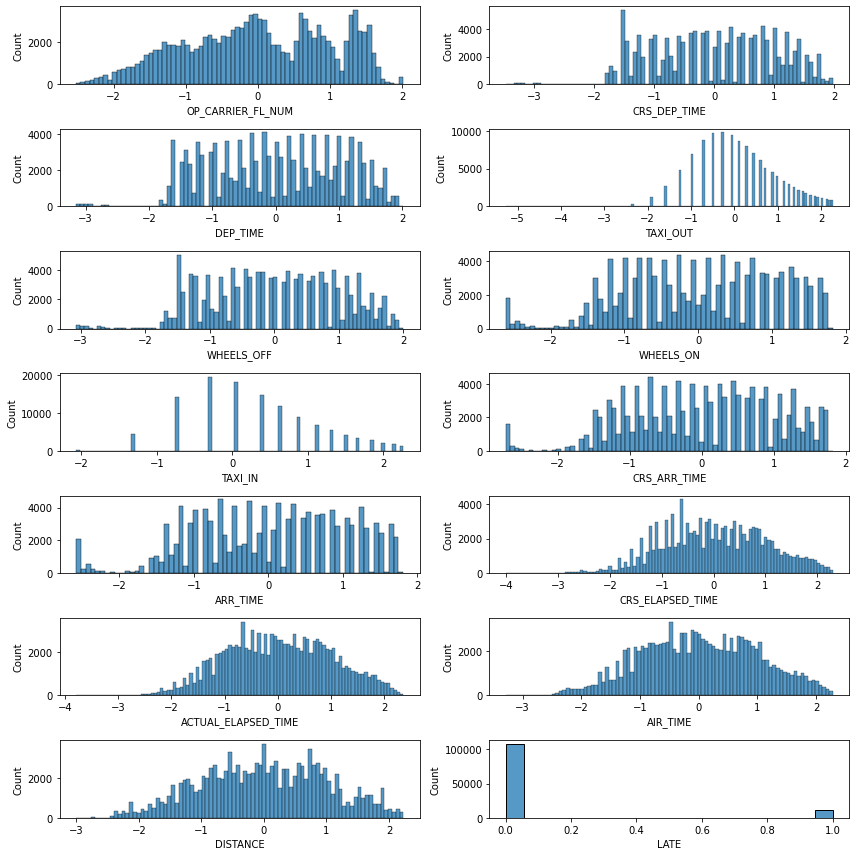

In [ ]:
histplot(df_rfe, 14)

####GRADIENT BOOSTING

We will use model Gradient Boosting

In [ ]:
feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = choose_dataset(df_rfe,'big')

feature train shape: (108103, 13)
target train shape: (108103,)
feature test shape: (12011, 13)
target test shape: (12011,)
number of train late: 10845
number of test late: 1219


we will train a default parameters of gradient boosting model

In [ ]:
clf = GradientBoostingClassifier(random_state=0,verbose = 5)
clf.fit(feature_train, target_train)

      Iter       Train Loss   Remaining Time 
         1           0.6221           39.55s
         2           0.6016           39.20s
         3           0.5892           38.37s
         4           0.5788           38.38s
         5           0.5717           37.88s
         6           0.5616           37.66s
         7           0.5576           37.40s
         8           0.5474           37.03s
         9           0.5444           36.84s
        10           0.5377           36.32s
        11           0.5354           35.84s
        12           0.5247           35.54s
        13           0.5171           35.08s
        14           0.5114           34.63s
        15           0.5082           34.23s
        16           0.5021           33.84s
        17           0.4945           33.44s
        18           0.4814           33.00s
        19           0.4796           32.67s
        20           0.4739           32.22s
        21           0.4647           31.79s
        2

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=5,
                           warm_start=False)

In [ ]:
print('train set score:', clf.score(feature_train, target_train))
print('test set score:', clf.score(feature_test, target_test))

train set score: 0.9571242241195896
test set score: 0.9547914411789193


#####Check with F1 score

In [ ]:
cal_f1score(clf)

precision: 0.9754443087776421
recall: 0.7155578837087481
f1_score: 0.8255304083767944


(0.8255304083767944, 0.7155578837087481)

#####Using small dataset to apply GRIDSEARCHCV

In [ ]:
feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = choose_dataset(df_rfe,'small')

feature train shape: (10810, 13)
target train shape: (10810,)
feature test shape: (1201, 13)
target test shape: (1201,)
number of train late: 1060
number of test late: 124


In [ ]:
clf = GradientBoostingClassifier()
parameters = {'loss': ['deviance', 'exponential'],
              'learning_rate': [0.05, 0.1, 0.15],
              #'n_estimators': [100, 150],
              'subsample': [0.5, 1],
              'criterion': ['friedman_mse', 'mse', 'mae'],
              #'max_depth': [3, 6],
              'max_features': ['auto','sqrt','log2']
}
grid_GBR = RandomizedSearchCV(estimator=clf, param_distributions = parameters, n_iter=15, cv = 2, n_jobs=-1, verbose=10)
#estimator: module
#param_grid: hyperparameters set
#cv = 2 mean it have 2 validation set, so the amount of tasks will be multiply by 2
#n_jobs = -1 mean it will run parallel
grid_GBR.fit(feature_train, target_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.4min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [ ]:
print('score:',grid_GBR.best_score_)
print('parameters:',grid_GBR.best_params_)

cal_f1score(grid_GBR)

score: 0.9562442183163737
parameters: {'subsample': 1, 'max_features': 'auto', 'loss': 'deviance', 'learning_rate': 0.15, 'criterion': 'friedman_mse'}
precision: 0.9759855006796556
recall: 0.7282051282051282
f1_score: 0.8340823316389973


(0.8340823316389973, 0.7282051282051282)

In [ ]:
clf = GradientBoostingClassifier(subsample=1, max_features='auto',
                                 loss='deviance', learning_rate=0.15, criterion='mse')
parameters = {'n_estimators': [200,300,400],
              'max_depth': [6,12,18]
                 }
grid_GBR = GridSearchCV(estimator=clf, param_grid = parameters, cv = 2, n_jobs=-1, verbose=10)
#estimator: module
#param_grid: hyperparameters set
#cv = 2 mean it have 2 validation set, so the amount of tasks will be multiply by 2
#n_jobs = -1 mean it will run parallel
grid_GBR.fit(feature_train, target_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.3min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='mse', init=None,
                                                  learning_rate=0.15,
                                                  loss='deviance', max_depth=3,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
               

In [ ]:
print('score:',grid_GBR.best_score_)
print('parameters:',grid_GBR.best_params_)
print('-------------------------------')
cal_f1score(grid_GBR)

score: 0.9751156336725255
parameters: {'max_depth': 6, 'n_estimators': 400}
-------------------------------
precision: 0.9893960350391885
recall: 0.9012875536480687
f1_score: 0.9432888055359033


(0.9432888055359033, 0.9012875536480687)

#####Continue with big dataset

In [ ]:
feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = choose_dataset(df_rfe,'big')

feature train shape: (108103, 13)
target train shape: (108103,)
feature test shape: (12011, 13)
target test shape: (12011,)
number of train late: 10845
number of test late: 1219


In [ ]:
clf = GradientBoostingClassifier(subsample=1, n_estimators=400, max_features='auto',
                                 max_depth=6, loss='deviance', learning_rate=0.15, criterion='mse', verbose = 5)
clf.fit(feature_train, target_train)

      Iter       Train Loss   Remaining Time 
         1           0.5489            5.18m
         2           0.5011            5.19m
         3           0.4548            5.14m
         4           0.4265            5.14m
         5           0.4065            5.15m
         6           0.3748            5.16m
         7           0.3589            5.13m
         8           0.3412            5.11m
         9           0.3248            5.10m
        10           0.3102            5.10m
        11           0.3011            5.10m
        12           0.2871            5.08m
        13           0.2748            5.07m
        14           0.2616            5.05m
        15           0.2519            5.03m
        16           0.2407            5.01m
        17           0.2288            4.99m
        18           0.2231            4.97m
        19           0.2151            4.96m
        20           0.2071            4.94m
        21           0.1994            4.92m
        2

GradientBoostingClassifier(ccp_alpha=0.0, criterion='mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=6,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=5,
                           warm_start=False)

In [ ]:
print('train set score:', clf.score(feature_train, target_train))
print('test set score:', clf.score(feature_test, target_test))

train set score: 1.0
test set score: 0.9927566397468987


In [ ]:
RFE_plot['f1score'], RFE_plot['recall'] = cal_f1score(clf)

precision: 0.9959738997639872
recall: 0.9639452963116453
f1_score: 0.9796978955550911


###Select K Best

In [ ]:
kbest_plot = dict()

In [ ]:
feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = choose_dataset(df_test,'big')

feature train shape: (130823, 20)
target train shape: (130823,)
feature test shape: (14536, 20)
target test shape: (14536,)
number of train late: 15838
number of test late: 1773


In [ ]:
#selectkbest
selectkbest = SelectKBest(k=13).fit(feature_train, target_train)

arr = selectkbest.get_support()
arr = np.append(arr,True)

df_kbest = df_test.loc[:, arr]
df_kbest

,MONTH,OP_UNIQUE_CARRIER,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,LATE
0,1,0,1405,1443.0,20.0,1503.0,1648.0,7.0,1610,1655.0,65.0,72.0,45.0,1
1,1,1,1515,1511.0,12.0,1523.0,1826.0,26.0,1843,1852.0,148.0,161.0,123.0,0
2,1,0,2200,4.0,7.0,11.0,108.0,4.0,2325,112.0,85.0,68.0,57.0,1
3,1,0,2125,2303.0,26.0,2329.0,26.0,5.0,2255,31.0,90.0,88.0,57.0,1
4,1,2,1016,1009.0,75.0,1124.0,1351.0,3.0,1342,1354.0,206.0,225.0,147.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145354,12,12,1554,1604.0,15.0,1619.0,1845.0,5.0,1848,1850.0,174.0,166.0,146.0,0
145355,12,0,1130,1128.0,12.0,1140.0,1225.0,2.0,1240,1227.0,70.0,59.0,45.0,0
145356,12,5,2359,2355.0,9.0,4.0,158.0,4.0,220,202.0,141.0,127.0,114.0,0
145357,12,3,605,604.0,13.0,617.0,721.0,10.0,739,731.0,94.0,87.0,64.0,0


In [ ]:
len(df_kbest.LATE[df_kbest.LATE == 1])

17611

####Preprocessing Data

In [ ]:
##outliers

df_temp = df_kbest.drop('LATE', axis=1)

Q1 = df_temp.quantile(0.25)
Q3 = df_temp.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

for i in range(len(IQR)):
  index = df_kbest[(df_kbest[IQR.index[i]] < (Q1[i] - 1.5 * IQR[i])) |
              (df_kbest[IQR.index[i]] > (Q3[i] + 1.5 * IQR[i]))].index
  df_kbest.drop(index,inplace=True)


In [ ]:
df_kbest

,MONTH,OP_UNIQUE_CARRIER,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,LATE
0,1,0,1405,1443.0,20.0,1503.0,1648.0,7.0,1610,1655.0,65.0,72.0,45.0,1
2,1,0,2200,4.0,7.0,11.0,108.0,4.0,2325,112.0,85.0,68.0,57.0,1
3,1,0,2125,2303.0,26.0,2329.0,26.0,5.0,2255,31.0,90.0,88.0,57.0,1
5,1,3,1410,1419.0,13.0,1432.0,1711.0,6.0,1722,1717.0,192.0,178.0,159.0,0
6,1,1,1913,1858.0,16.0,1914.0,2219.0,8.0,2241,2227.0,148.0,149.0,125.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145354,12,12,1554,1604.0,15.0,1619.0,1845.0,5.0,1848,1850.0,174.0,166.0,146.0,0
145355,12,0,1130,1128.0,12.0,1140.0,1225.0,2.0,1240,1227.0,70.0,59.0,45.0,0
145356,12,5,2359,2355.0,9.0,4.0,158.0,4.0,220,202.0,141.0,127.0,114.0,0
145357,12,3,605,604.0,13.0,617.0,721.0,10.0,739,731.0,94.0,87.0,64.0,0


In [ ]:
len(df_kbest.LATE[df_kbest.LATE == 1])

12123

In [ ]:
#Normalize

df_temp = df_kbest.drop('LATE', axis=1)
#
feature_temp = []
for i in df_temp:
  feature_temp.append(list(df_temp[i]))
#
feature_norm = []
for i in range(len(feature_temp)):
  temp = np.array(feature_temp[i]).reshape(-1,1)
  bc = PowerTransformer(method='box-cox')
  transform_model = bc.fit(temp + 0.001) # 0.001 was added to avoid zero-values that will prevent transformation
  temp = transform_model.transform(temp + 1)
  feature_norm.append(temp)
#
feature_norm = np.array(feature_norm)
feature_norm = np.squeeze(feature_norm)
#
i=0
for feature in df_temp:
  df_kbest[feature] = feature_norm[i]
  i += 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_kbest.describe()

,MONTH,OP_UNIQUE_CARRIER,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,LATE
count,120932.000000,120932.000000,120932.000000,120932.000000,120932.000000,120932.000000,120932.000000,120932.000000,120932.000000,120932.000000,120932.000000,120932.000000,120932.000000,120932.000000
mean,0.292902,0.334827,0.002064,0.001999,0.189859,0.001990,0.001888,0.351485,0.001941,0.001876,0.022057,0.022463,0.023527,0.100246
std,0.958178,0.650316,0.999776,0.999825,0.931291,0.999863,1.000072,0.856144,1.000073,1.000083,0.991444,0.990976,0.989532,0.300330
min,-1.405125,-0.678976,-3.477395,-3.145029,-5.286664,-3.055607,-2.604003,-2.074637,-2.713763,-2.576786,-4.058815,-3.821526,-3.317224,0.000000
25%,-0.408402,-0.095924,-0.810967,-0.794550,-0.484531,-0.814924,-0.785104,-0.311081,-0.743611,-0.781443,-0.727183,-0.715236,-0.725742,0.000000
50%,0.451115,0.413154,0.030140,0.022961,0.108552,-0.004516,-0.014595,0.371293,0.035520,-0.017570,0.002388,0.000571,0.009541,0.000000
75%,1.238163,0.880562,0.836875,0.822596,0.871554,0.802748,0.846610,0.893673,0.835947,0.842655,0.758447,0.760591,0.770502,0.000000
max,1.735162,1.468464,1.973090,2.012114,2.274153,1.992437,1.822298,2.265871,1.820757,1.809534,2.240656,2.294677,2.228740,1.000000


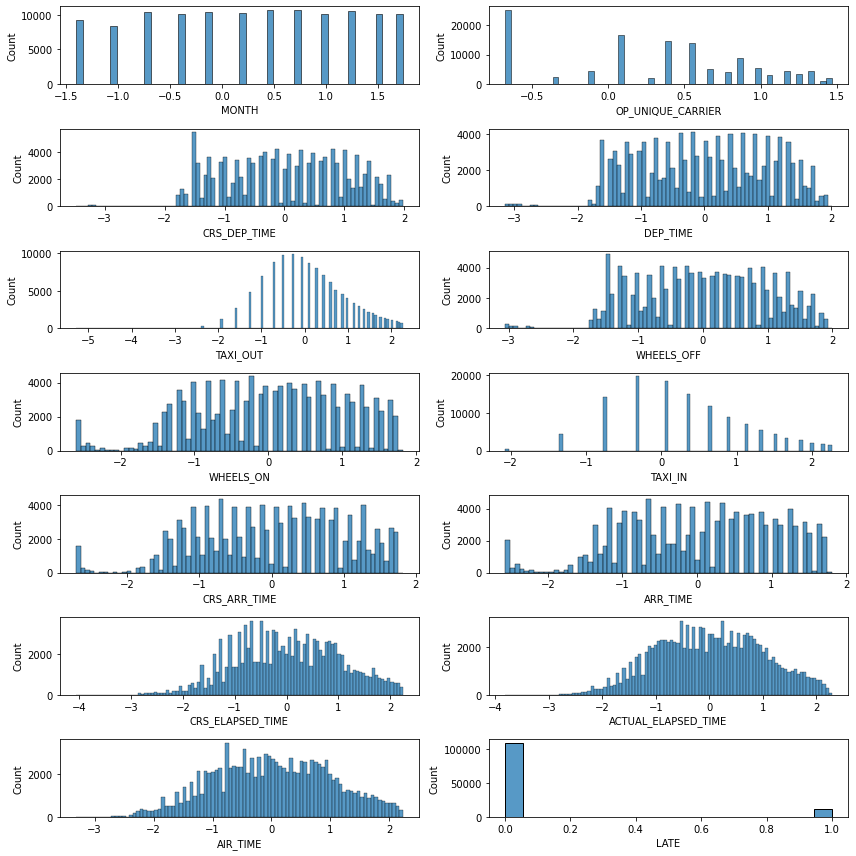

In [ ]:
histplot(df_kbest, 14)

####GRADIENT BOOSTING

We will use model Gradient Boosting

In [ ]:
feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = choose_dataset(df_kbest,'big')

feature train shape: (108839, 13)
target train shape: (108839,)
feature test shape: (12093, 13)
target test shape: (12093,)
number of train late: 10891
number of test late: 1232


we will train a default parameters of gradient boosting model

In [ ]:
clf = GradientBoostingClassifier(random_state=0,verbose = 5)
clf.fit(feature_train, target_train)

      Iter       Train Loss   Remaining Time 
         1           0.6215           35.40s
         2           0.6066           37.49s
         3           0.5948           36.31s
         4           0.5851           35.48s
         5           0.5724           34.74s
         6           0.5640           34.51s
         7           0.5598           33.84s
         8           0.5565           33.49s
         9           0.5521           33.14s
        10           0.5494           32.95s
        11           0.5471           32.48s
        12           0.5447           32.23s
        13           0.5338           31.88s
        14           0.5264           31.44s
        15           0.5189           30.98s
        16           0.5100           30.52s
        17           0.4981           30.10s
        18           0.4961           29.75s
        19           0.4894           29.48s
        20           0.4831           29.06s
        21           0.4720           28.70s
        2

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=5,
                           warm_start=False)

In [ ]:
print('train set score:', clf.score(feature_train, target_train))
print('test set score:', clf.score(feature_test, target_test))

train set score: 0.9555122704177731
test set score: 0.9558422227735053


#####Check with F1 score

In [ ]:
cal_f1score(clf)

precision: 0.9759978425026968
recall: 0.7244582043343653
f1_score: 0.8316235467878221


(0.8316235467878221, 0.7244582043343653)

#####Using small dataset to apply GRIDSEARCHCV

In [ ]:
feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = choose_dataset(df_kbest,'small')

feature train shape: (10884, 13)
target train shape: (10884,)
feature test shape: (1209, 13)
target test shape: (1209,)
number of train late: 1066
number of test late: 138


In [ ]:
clf = GradientBoostingClassifier()
parameters = {'loss': ['deviance', 'exponential'],
              'learning_rate': [0.05, 0.1, 0.15],
              #'n_estimators': [100, 150],
              'subsample': [0.5, 1],
              'criterion': ['friedman_mse', 'mse', 'mae'],
              #'max_depth': [3, 6],
              'max_features': ['auto','sqrt','log2']
}
grid_GBR = RandomizedSearchCV(estimator=clf, param_distributions = parameters, n_iter=15, cv = 2, n_jobs=-1, verbose=10)
#estimator: module
#param_grid: hyperparameters set
#cv = 2 mean it have 2 validation set, so the amount of tasks will be multiply by 2
#n_jobs = -1 mean it will run parallel
grid_GBR.fit(feature_train, target_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.9min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [ ]:
print('score:',grid_GBR.best_score_)
print('parameters:',grid_GBR.best_params_)

cal_f1score(grid_GBR)

score: 0.9383498713708196
parameters: {'subsample': 0.5, 'max_features': 'auto', 'loss': 'exponential', 'learning_rate': 0.15, 'criterion': 'friedman_mse'}
precision: 0.9661399548532731
recall: 0.6305418719211823
f1_score: 0.7630721230186367


(0.7630721230186367, 0.6305418719211823)

In [ ]:
clf = GradientBoostingClassifier(subsample=1, max_features='auto',
                                 loss='deviance', learning_rate=0.15, criterion='mse')
parameters = {'n_estimators': [200,300,400],
              'max_depth': [6,12,18]
                 }
grid_GBR = GridSearchCV(estimator=clf, param_grid = parameters, cv = 2, n_jobs=-1, verbose=10)
#estimator: module
#param_grid: hyperparameters set
#cv = 2 mean it have 2 validation set, so the amount of tasks will be multiply by 2
#n_jobs = -1 mean it will run parallel
grid_GBR.fit(feature_train, target_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.2min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='mse', init=None,
                                                  learning_rate=0.15,
                                                  loss='deviance', max_depth=3,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
               

In [ ]:
print('score:',grid_GBR.best_score_)
print('parameters:',grid_GBR.best_params_)
print('-------------------------------')
cal_f1score(grid_GBR)

score: 0.9772142594634325
parameters: {'max_depth': 6, 'n_estimators': 300}
-------------------------------
precision: 0.9907321594068582
recall: 0.923076923076923
f1_score: 0.9557086980815793


(0.9557086980815793, 0.923076923076923)

#####Continue with big dataset

In [ ]:
feature_train, feature_test, target_train, target_test, train_dataset, test_dataset = choose_dataset(df_kbest,'big')

feature train shape: (108839, 13)
target train shape: (108839,)
feature test shape: (12093, 13)
target test shape: (12093,)
number of train late: 10891
number of test late: 1232


In [ ]:
clf = GradientBoostingClassifier(subsample=0.5, n_estimators=300, max_features='auto',
                                 max_depth=6, loss='exponential', learning_rate=0.15, criterion='friedman_mse', verbose = 5)
clf.fit(feature_train, target_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5758           0.0275            1.92m
         2           0.5460           0.0226            1.89m
         3           0.5276           0.0211            1.90m
         4           0.5051           0.0192            1.88m
         5           0.4832           0.0211            1.88m
         6           0.4681           0.0141            1.89m
         7           0.4507           0.0165            1.88m
         8           0.4369           0.0172            1.88m
         9           0.4194           0.0137            1.87m
        10           0.4103           0.0112            1.86m
        11           0.4016           0.0099            1.85m
        12           0.3911           0.0094            1.84m
        13           0.3726           0.0158            1.84m
        14           0.3608           0.0107            1.84m
        15           0.3474           0.0117            1.83m
       

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='exponential', max_depth=6,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=5,
                           warm_start=False)

In [ ]:
print('train set score:', clf.score(feature_train, target_train))
print('test set score:', clf.score(feature_test, target_test))

train set score: 0.9997886786905429
test set score: 0.9934672951294137


In [ ]:
kbest_plot['f1score'], kbest_plot['recall'] = cal_f1score(clf)

precision: 0.9963713196453998
recall: 0.967287784679089
f1_score: 0.9816141756734552


##Compare Selection feature algorithms

recall manual pick

In [ ]:
manual_plot = dict()

In [ ]:
manual_plot['f1score'] = f1score_plot['b_gradboost']
manual_plot['recall'] = recall_plot['b_gradboost']

compare

In [ ]:
manual_plot

{'f1score': 0.9737179764061417, 'recall': 0.953204476093591}

In [ ]:
RFE_plot

{'f1score': 0.9796978955550911, 'recall': 0.9639452963116453}

In [ ]:
kbest_plot

{'f1score': 0.9816141756734552, 'recall': 0.967287784679089}

We can see that K best algorithm have the highest f1score and recall. So the best model we use will be:

1.   Using Kbest to select feature.
2.   Using gradient boosting to build model predict.

But the fact is we isn't optimize the model very well, Also hyperparameters is changing when we use different model so that the result compare to algorithms is not very accuracy.